In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from glob import glob

In [4]:
files=glob("C:\\Users\\v35431nc\\Documents\\Lab_Stuff/Parameter_Inference/Samples/t1_0.01/*.csv")
files_s=glob("C:\\Users\\v35431nc\\Documents\\Lab_Stuff/Parameter_Inference/Samples/t1_0.01/stretch/*.csv")
files_data=glob("C:\\Users\\v35431nc\\Documents\\Lab_Stuff/Parameter_Inference/Data/*/*/Data/*cell_data_geometry.csv")


df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
df_s = pd.concat((pd.read_csv(f) for f in files_s), ignore_index=True)
full_dat=pd.concat((pd.read_csv(f) for f in files_data), ignore_index=True)

In [109]:
full_dat

cell_id  cell_perimeter_microns  cell_area_microns  shape_parameter  \
0          0.0               60.695986         202.524894         4.265017   
1          1.0               27.622853          38.137805         4.472915   
2          2.0               44.701069         123.326847         4.025215   
3          3.0               59.841093         214.214643         4.088603   
4          4.0               41.368440         104.769372         4.041587   
...        ...                     ...                ...              ...   
43004    475.0              111.320270         781.605814         3.981808   
43005    476.0               98.044984         653.310823         3.835884   
43006    477.0               96.246249         616.049750         3.877715   
43007    478.0               92.730652         601.437564         3.781186   
43008    479.0               90.638259         602.460417         3.692728   

       circularity  cell_edge_count  major_shape_axis_alignment_rads  \
0         0.495923              4.0                         0.583288   
1         0.211081              4.0                         1.467934   
2         0.825670              4.0                         1.799196   
3         0.564842              4.0                         0.581209   
4         0.818500              4.0                         0.241761   
...            ...              ...                              ...   
43004     0.344962              8.0                         1.550842   
43005     0.444665              8.0                         0.892548   
43006     0.660886              8.0                         0.719338   
43007     0.465782              8.0                         2.004514   
43008     0.684488              8.0                         1.050749   

       cell_zeta  time     experiment stretch_type  
0       0.137084   0.0  20230803_2_IP            f  
1       0.201755   0.0  20230803_2_IP            f  
2       0.046606   0.0  20230803_2_IP            f  
3       0.079481   0.0  20230803_2_IP            f  
4       0.034583   0.0  20230803_2_IP            f  
...          ...   ...            ...          ...  
43004   0.187251   0.0  20240517_1_IN            f  
43005   0.101453   0.0  20240517_1_IN            f  
43006   0.068145   0.0  20240517_1_IN            f  
43007   0.122932   0.0  20240517_1_IN            f  
43008   0.046273   0.0  20240517_1_IN            f  

[43009 rows x 11 columns]

In [23]:
df['area_norm']=df["areas"]/df.groupby(["L_0", "Gamma"]).areas.transform("mean")
df['perimeter_norm']=df["perimeters"]/df.groupby(["L_0", "Gamma"]).perimeters.transform("mean")
df['circ_norm']=df["circularity"]/df.groupby(["L_0", "Gamma"]).circularity.transform("mean")


df_s['area_norm']=df_s["areas"]/df_s.groupby(["L_0", "Gamma"]).areas.transform("mean")
df_s['perimeter_norm']=df_s["perimeters"]/df_s.groupby(["L_0", "Gamma"]).perimeters.transform("mean")

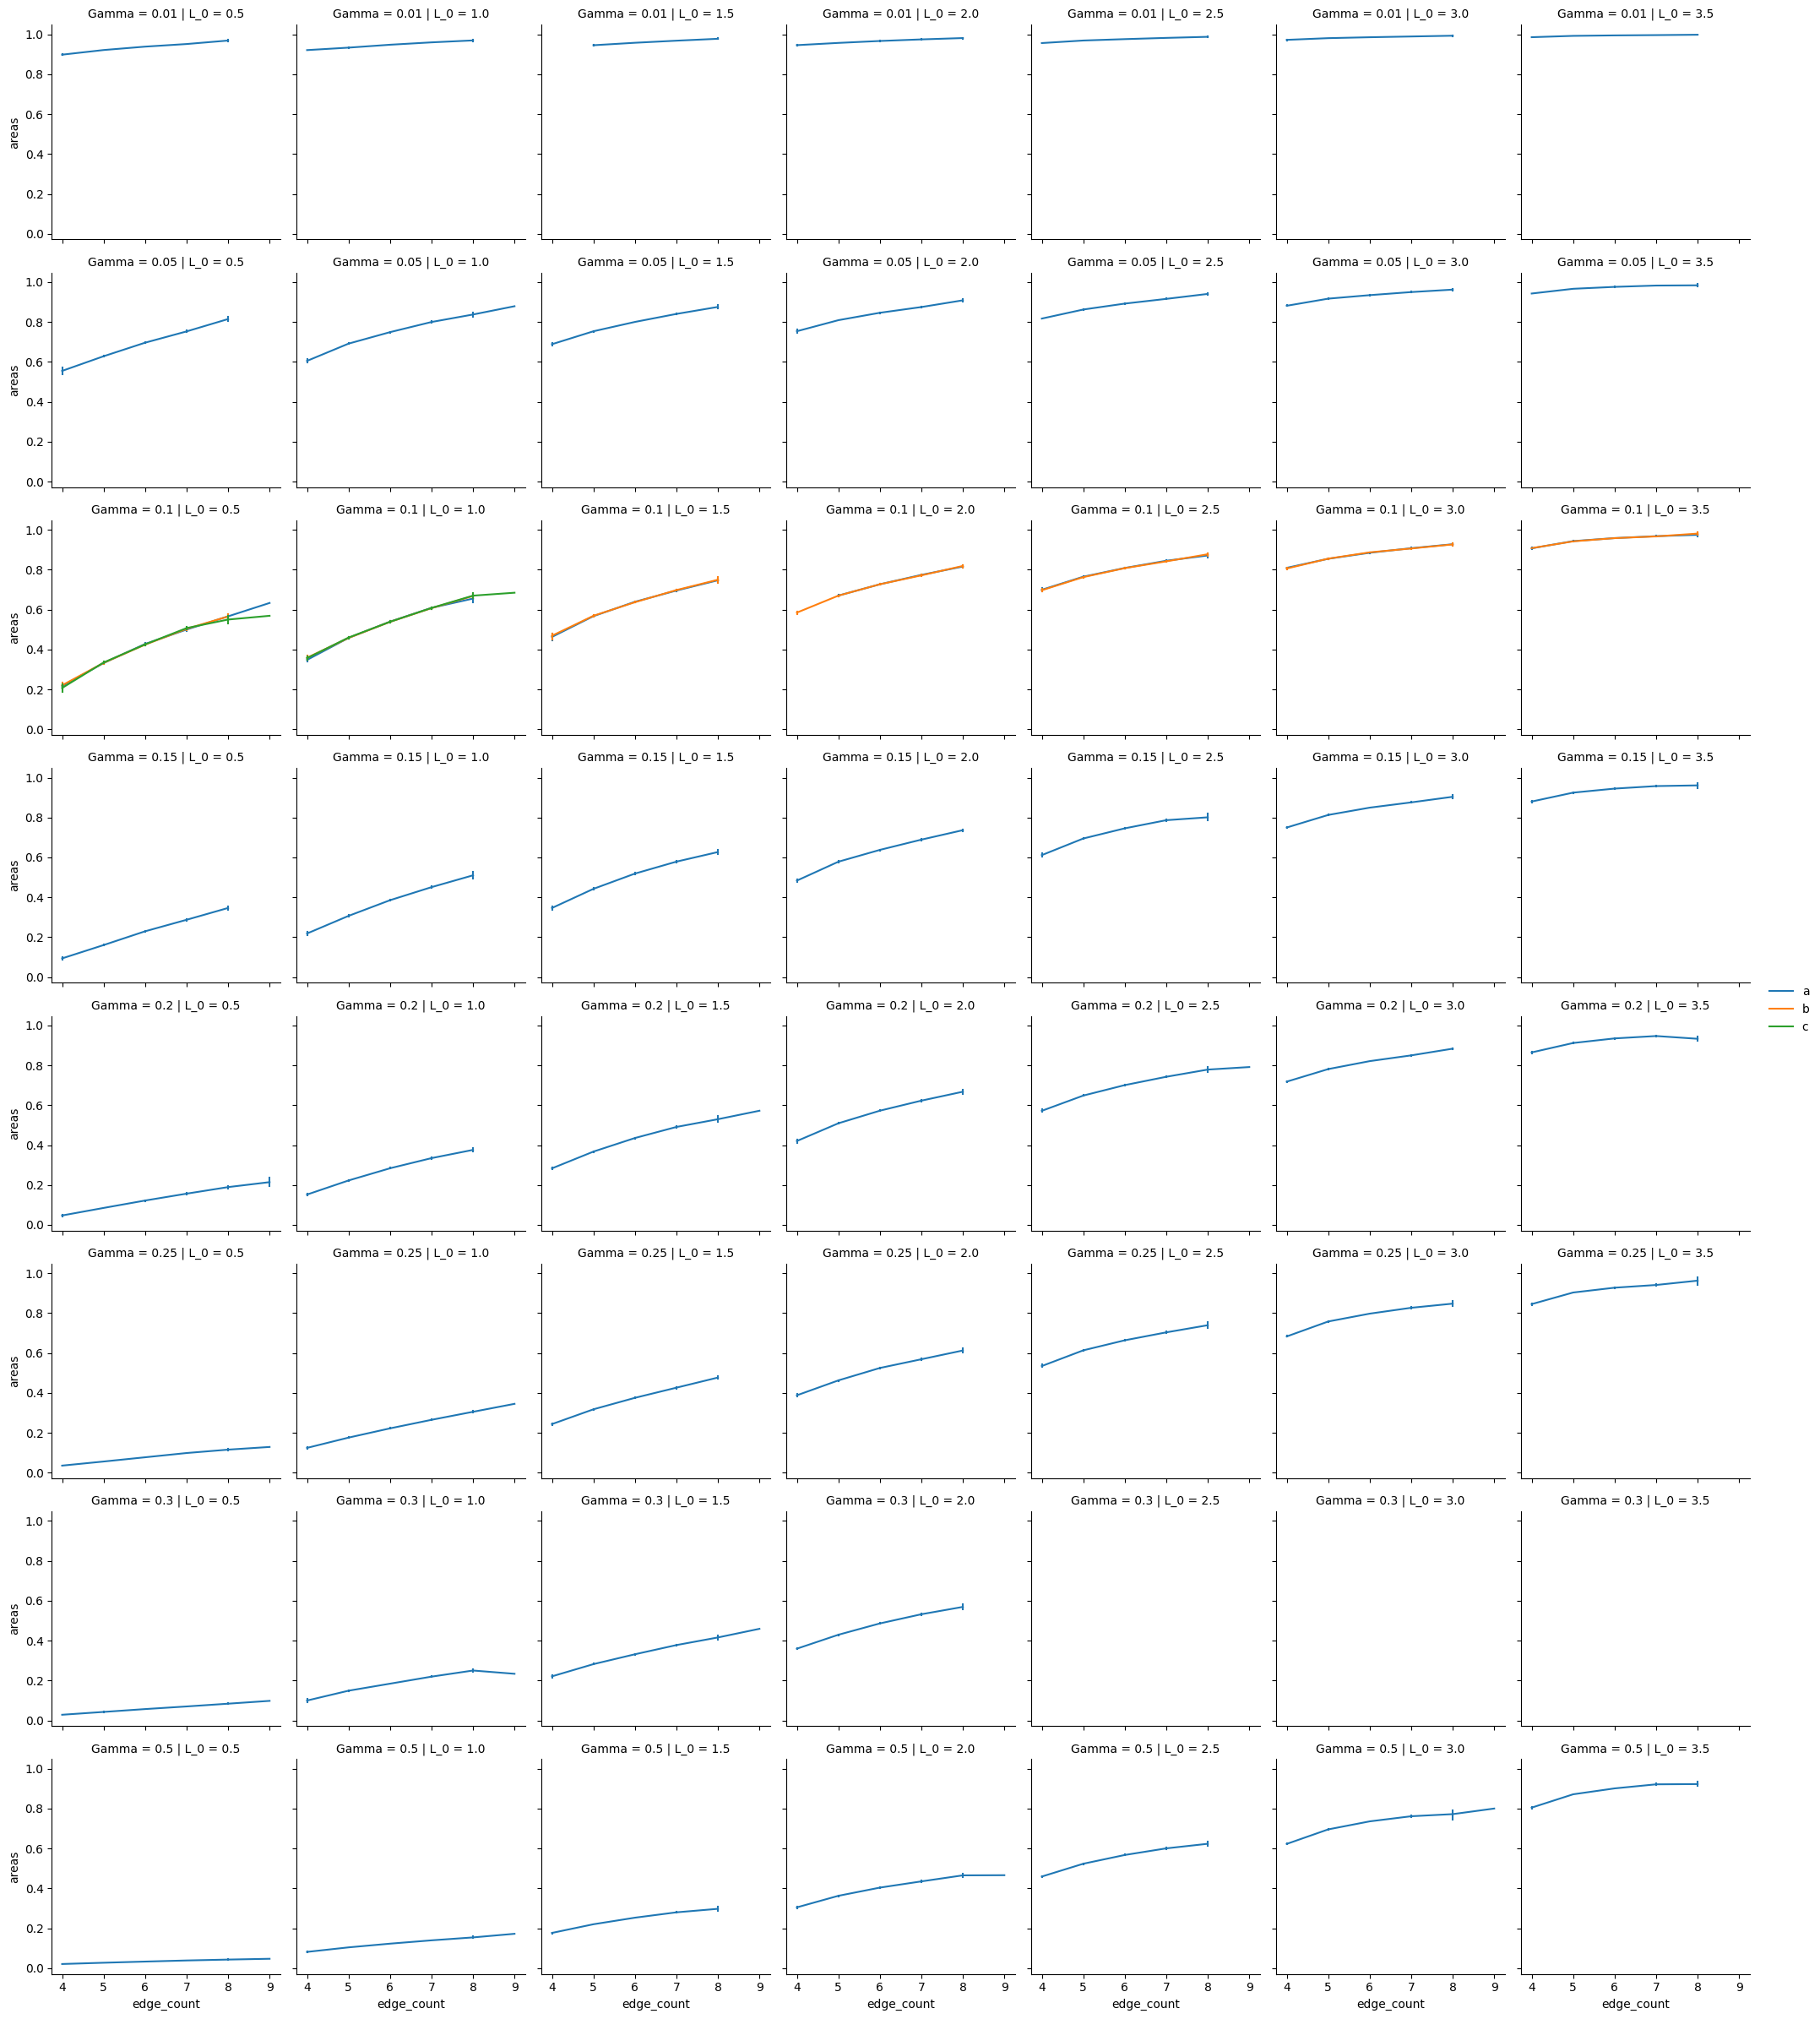

In [92]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.lineplot, x="edge_count", y="areas", err_style="bars", hue='sample_set')
g.add_legend()

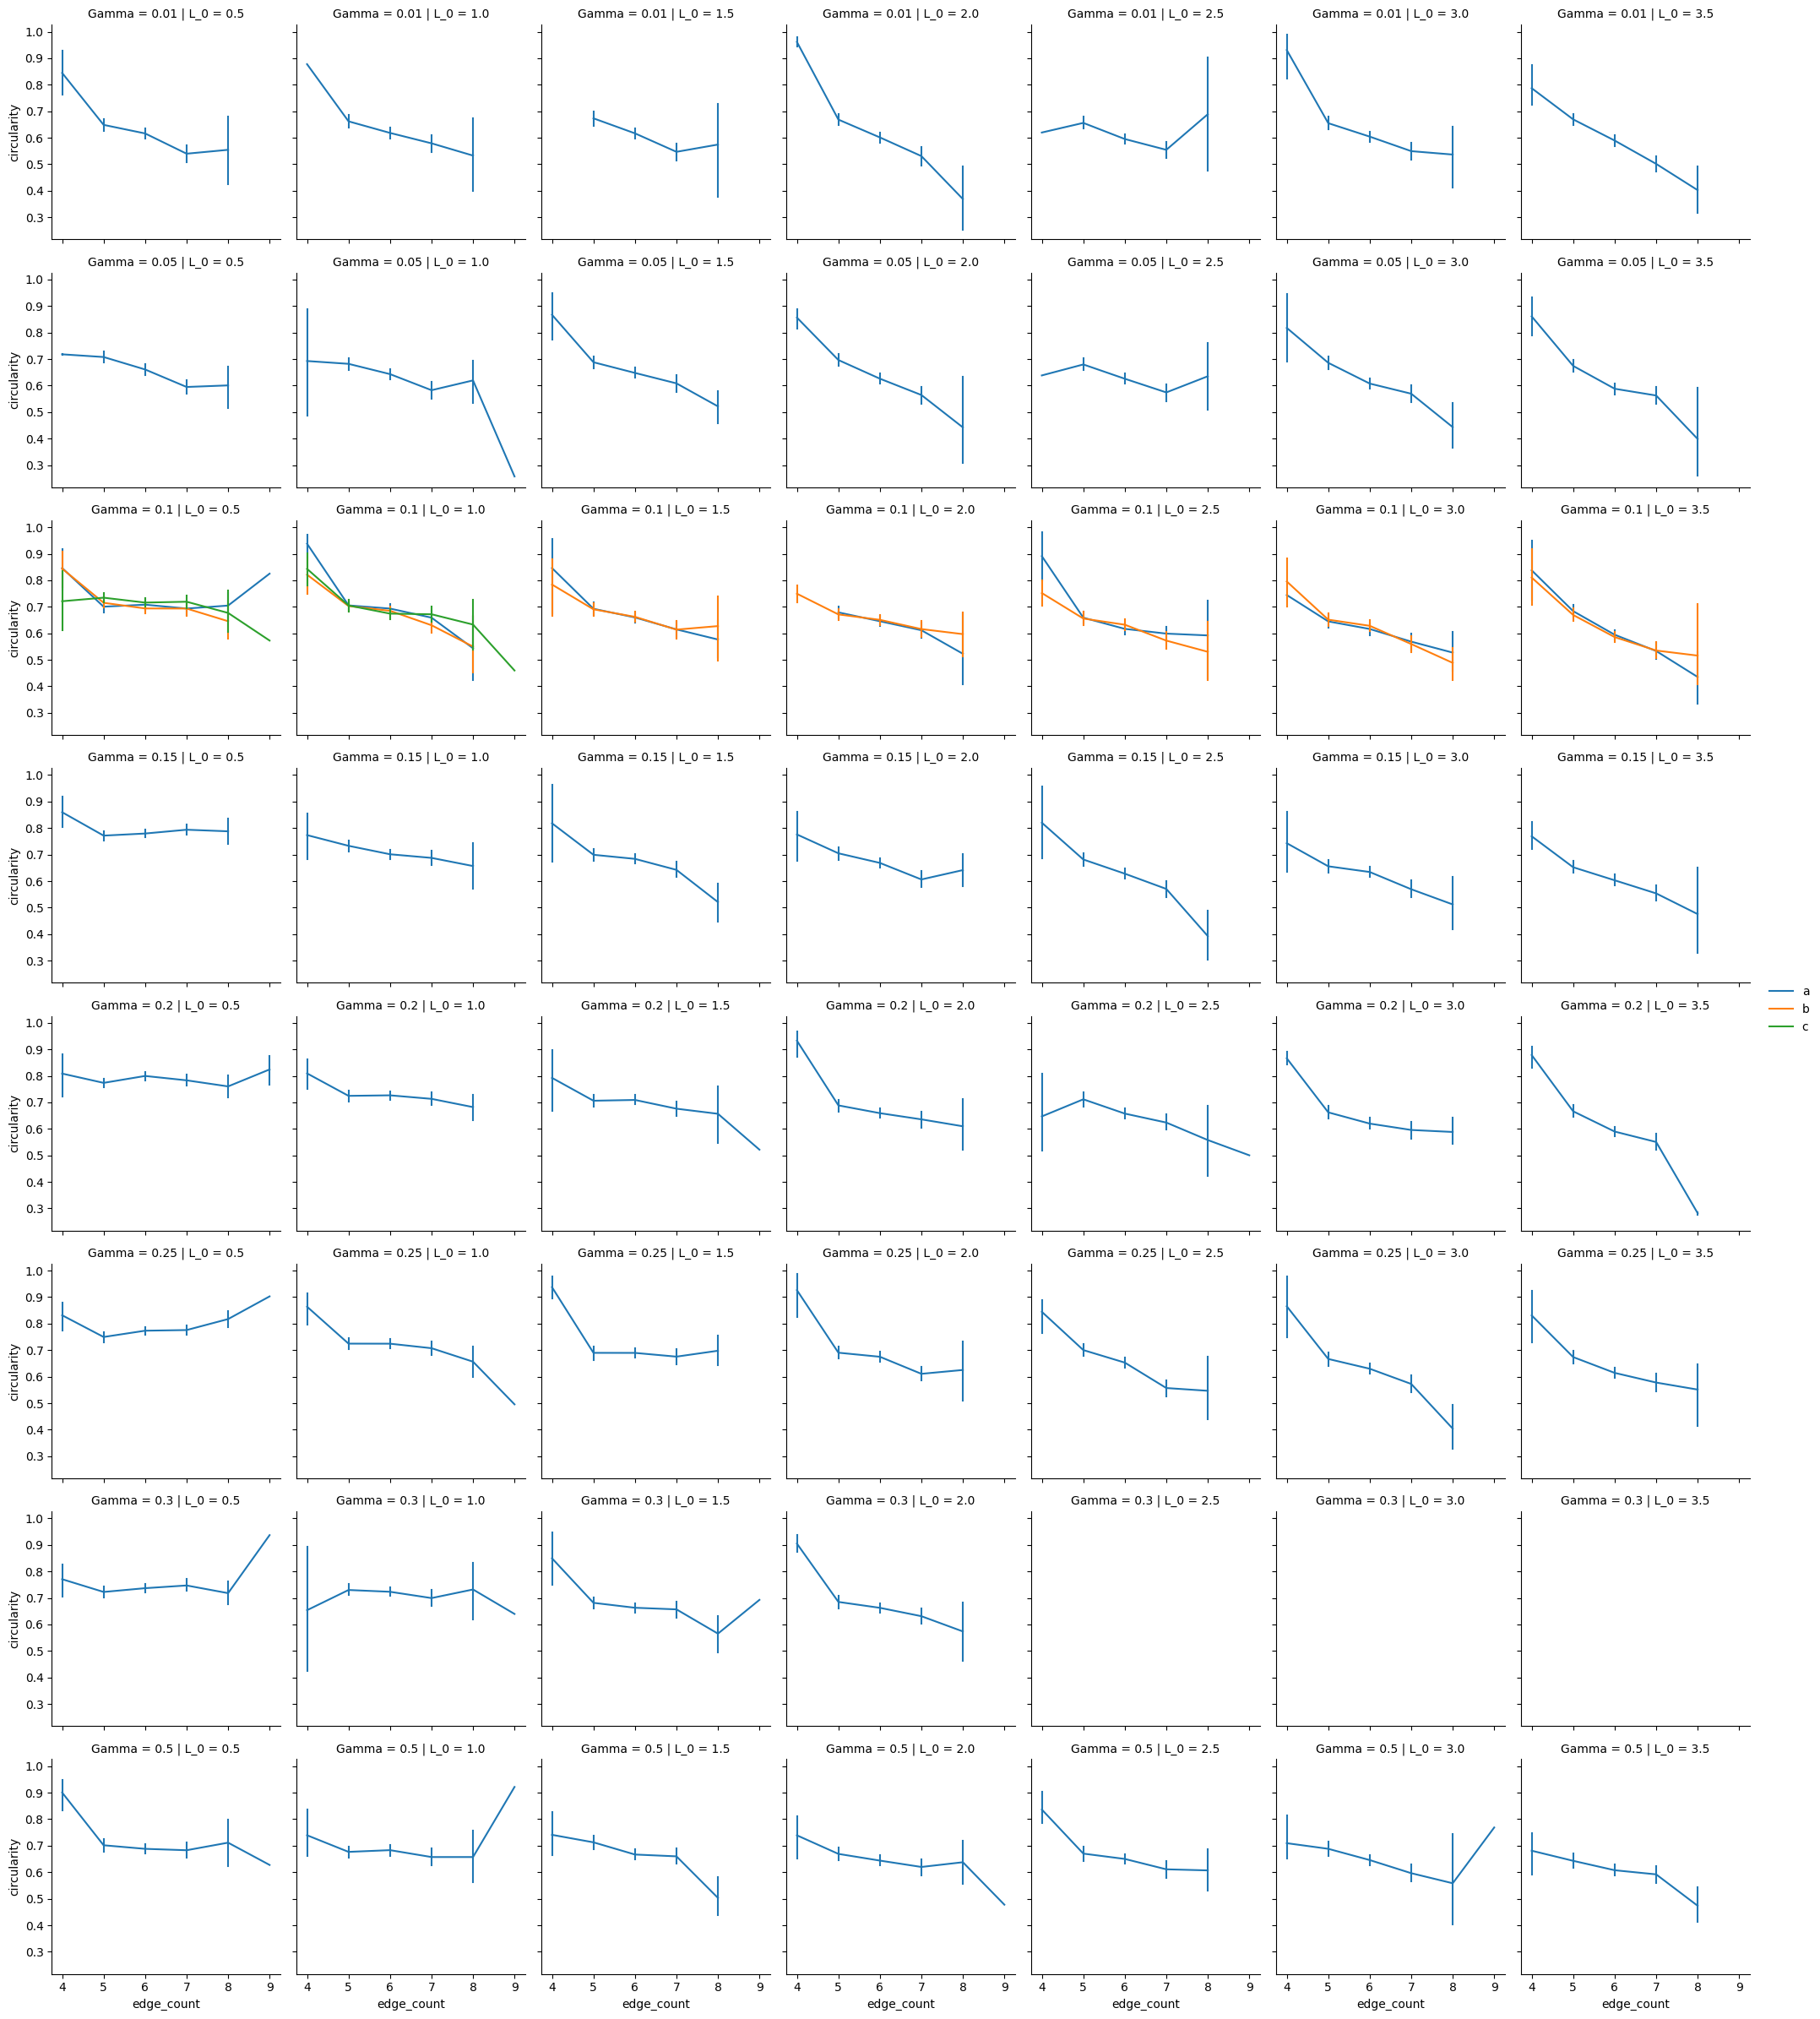

In [93]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.lineplot, x="edge_count", y="circularity", err_style="bars", hue='sample_set')
g.add_legend()

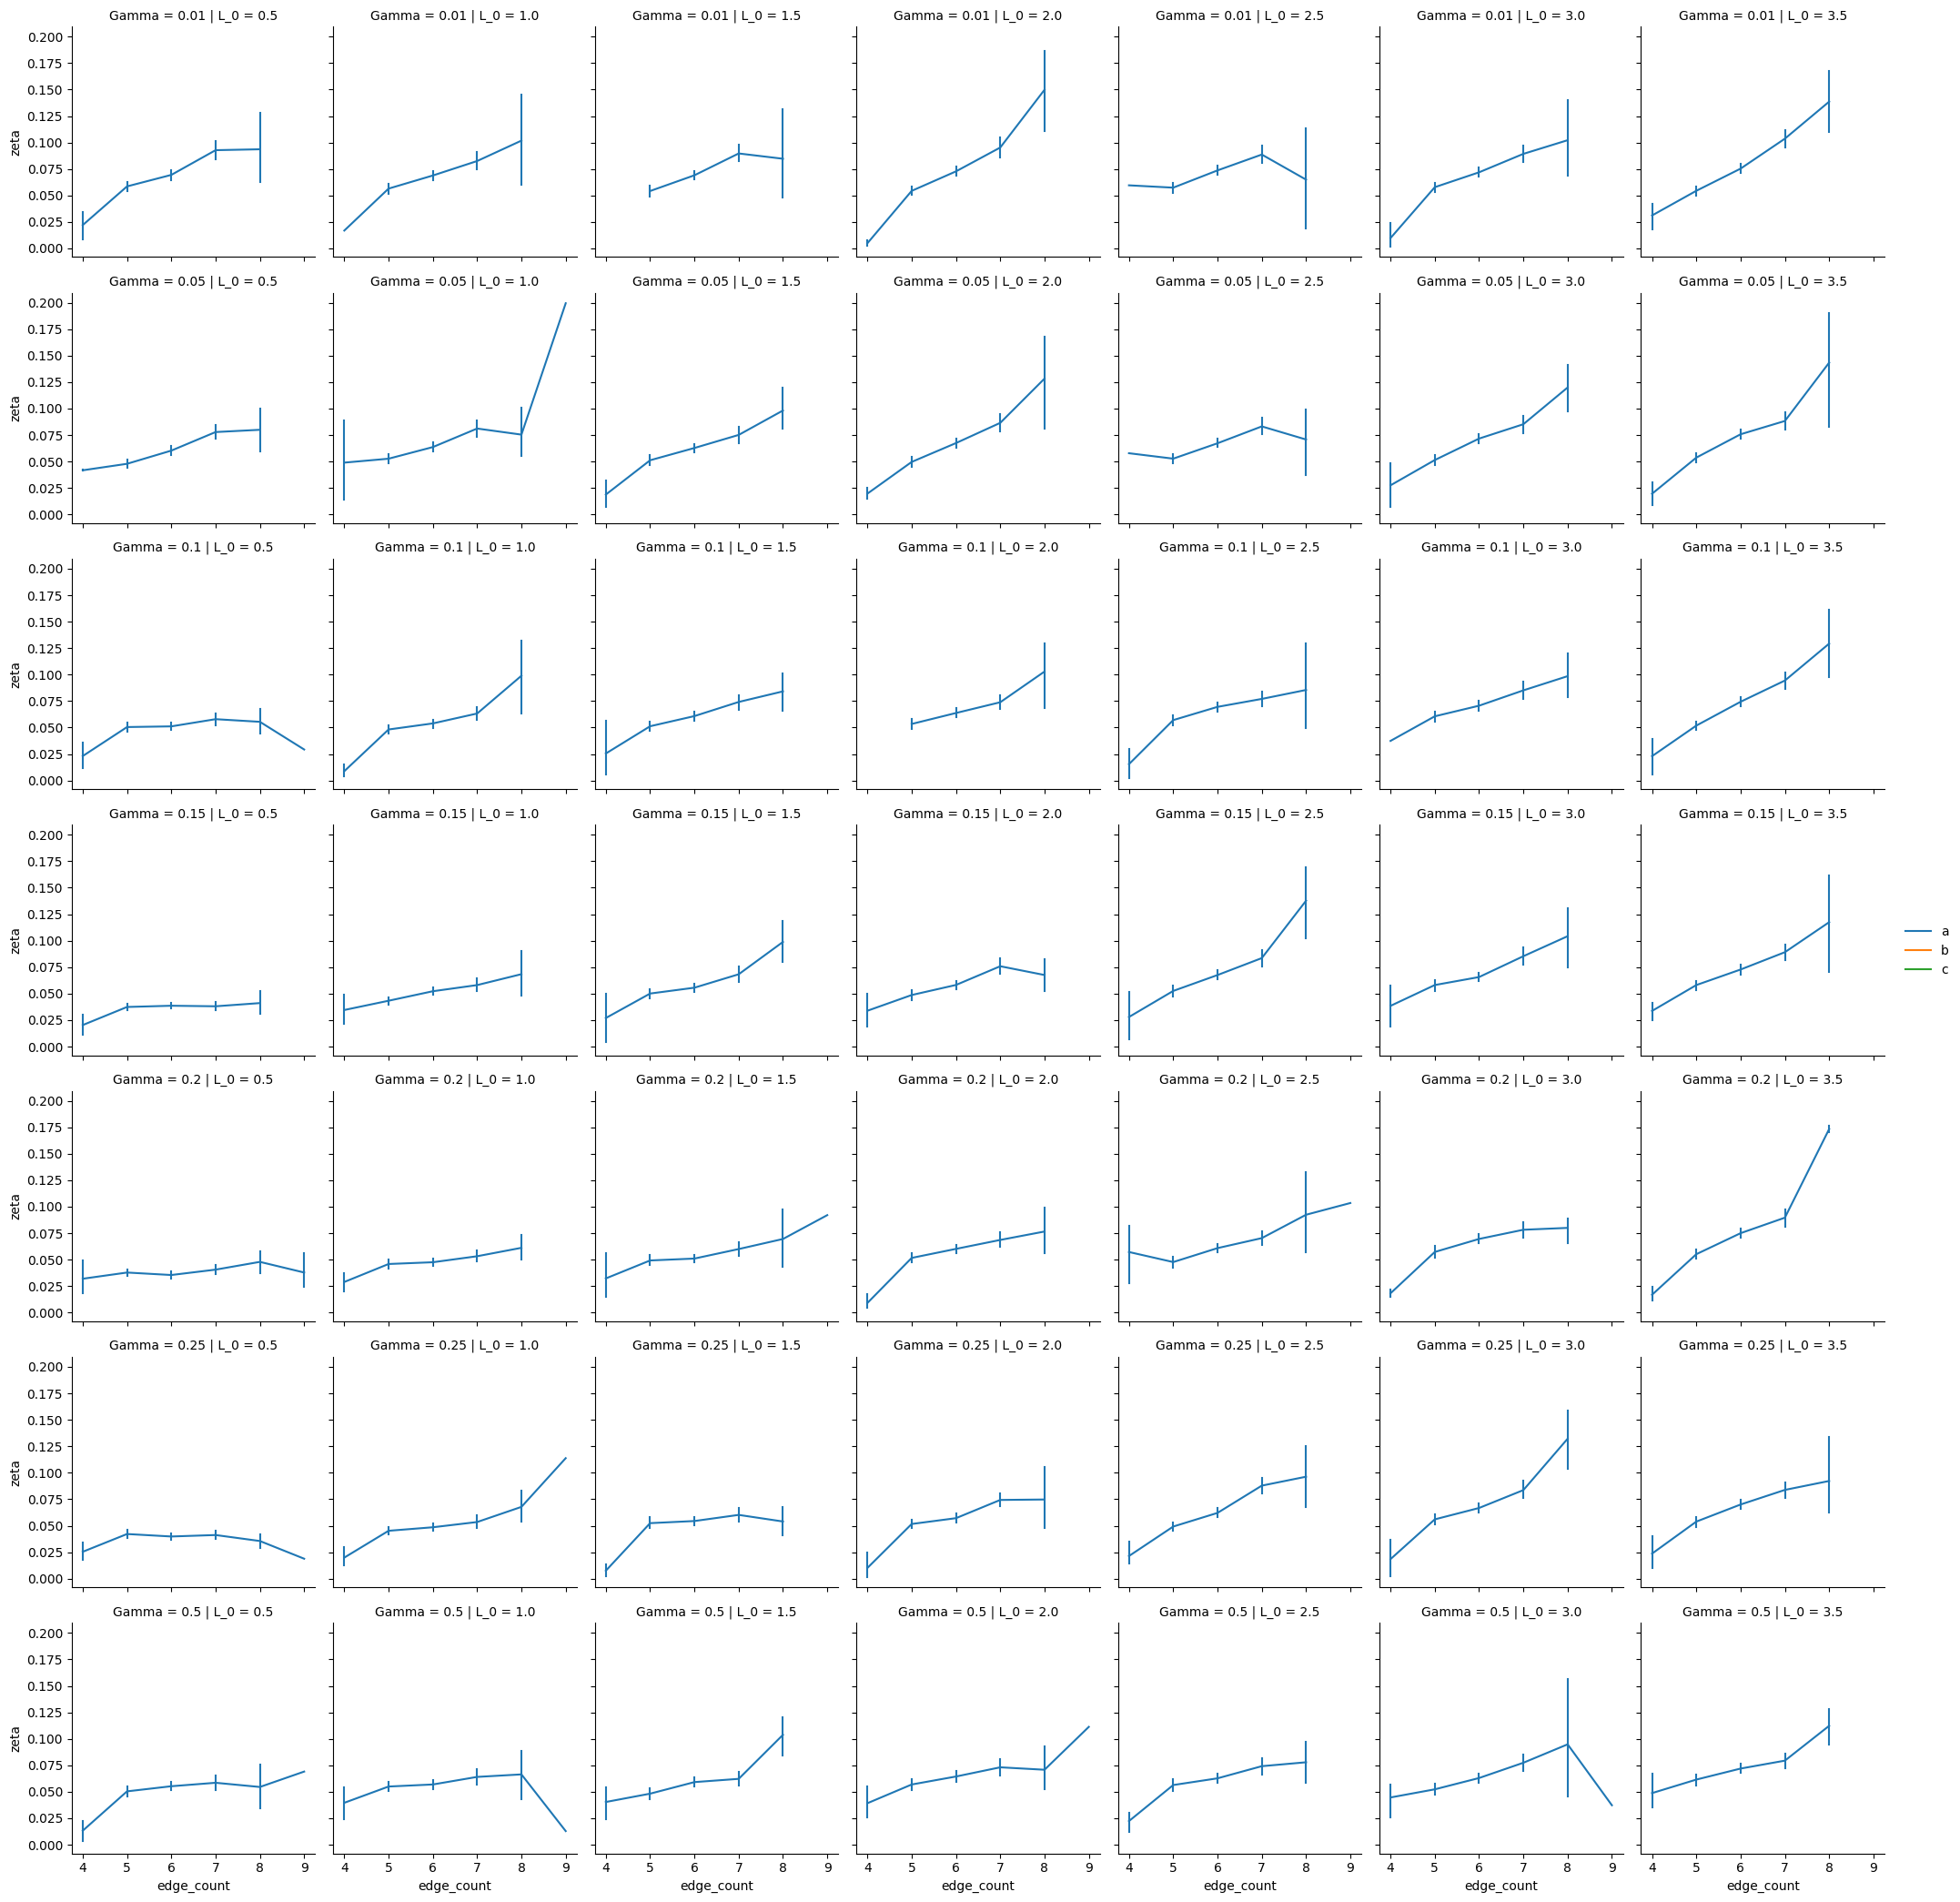

In [80]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.lineplot, x="edge_count", y="zeta", err_style="bars", hue='sample_set')
g.add_legend()

<AxesSubplot: xlabel='edge_count', ylabel='circularity'>

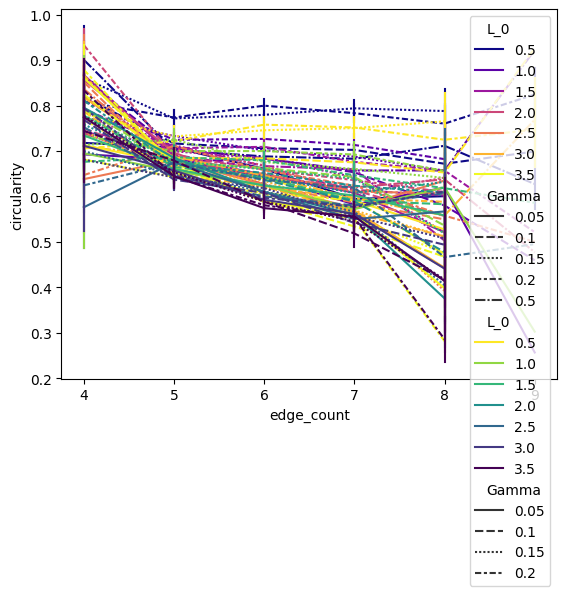

In [253]:
sns.lineplot(df, x='edge_count', y='circularity', hue="L_0", style="Gamma",palette='plasma', err_style='bars')
sns.lineplot(df_s, x='edge_count', y='circularity', hue="L_0", style="Gamma",palette='viridis_r', err_style='bars')

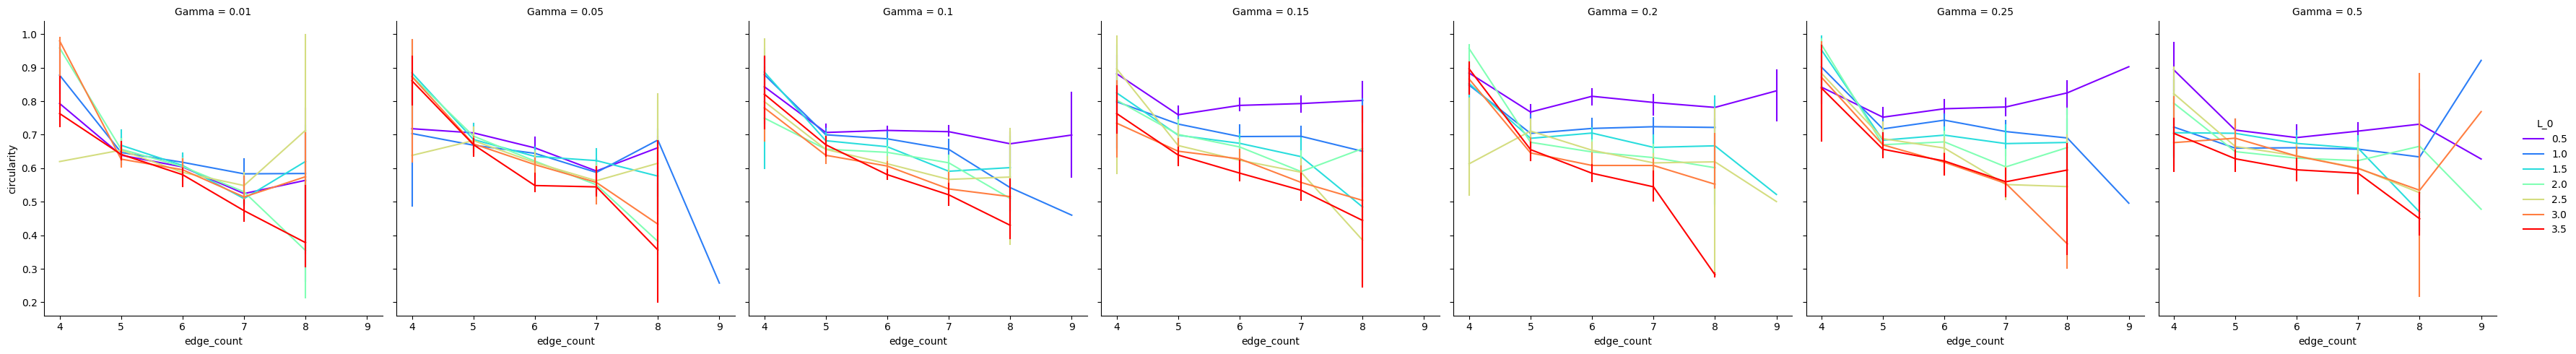

In [15]:
sns.relplot(df, x='edge_count', y='circularity', hue="L_0", col='Gamma', palette='rainbow',kind='line', err_style="bars", estimator='median')

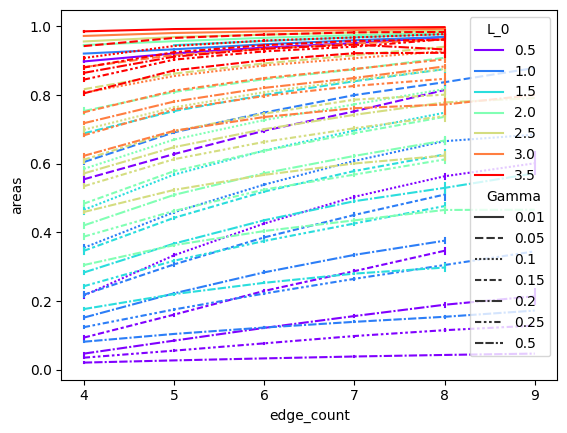

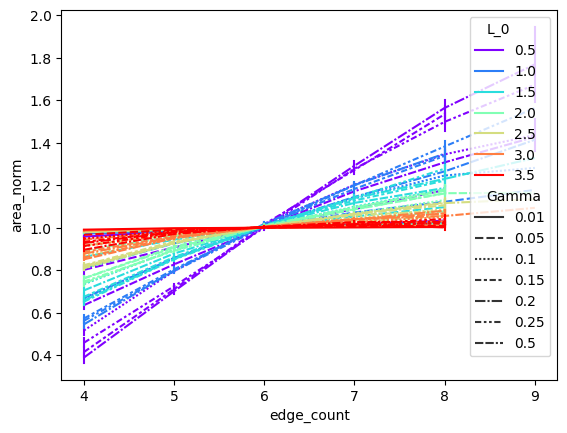

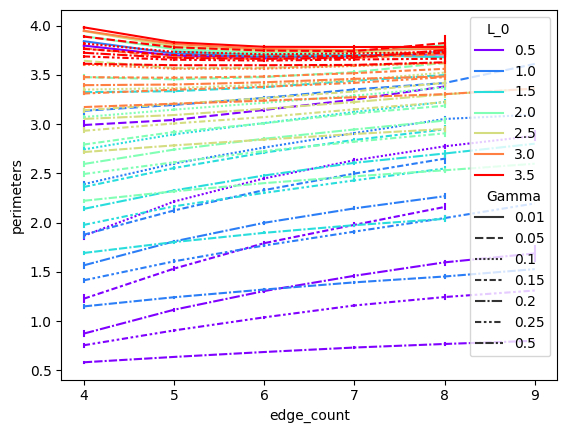

<AxesSubplot: xlabel='edge_count', ylabel='perimeter_norm'>

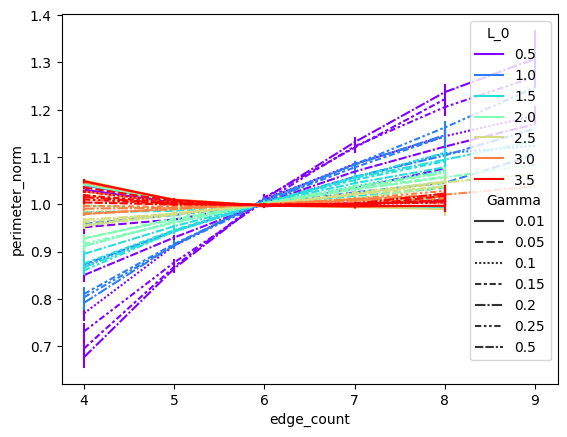

In [16]:
sns.lineplot(df, x='edge_count', y='areas', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")
plt.show()
sns.lineplot(df, x='edge_count', y='area_norm', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")
plt.show()
sns.lineplot(df, x='edge_count', y='perimeters', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")
plt.show()
sns.lineplot(df, x='edge_count', y='perimeter_norm', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")


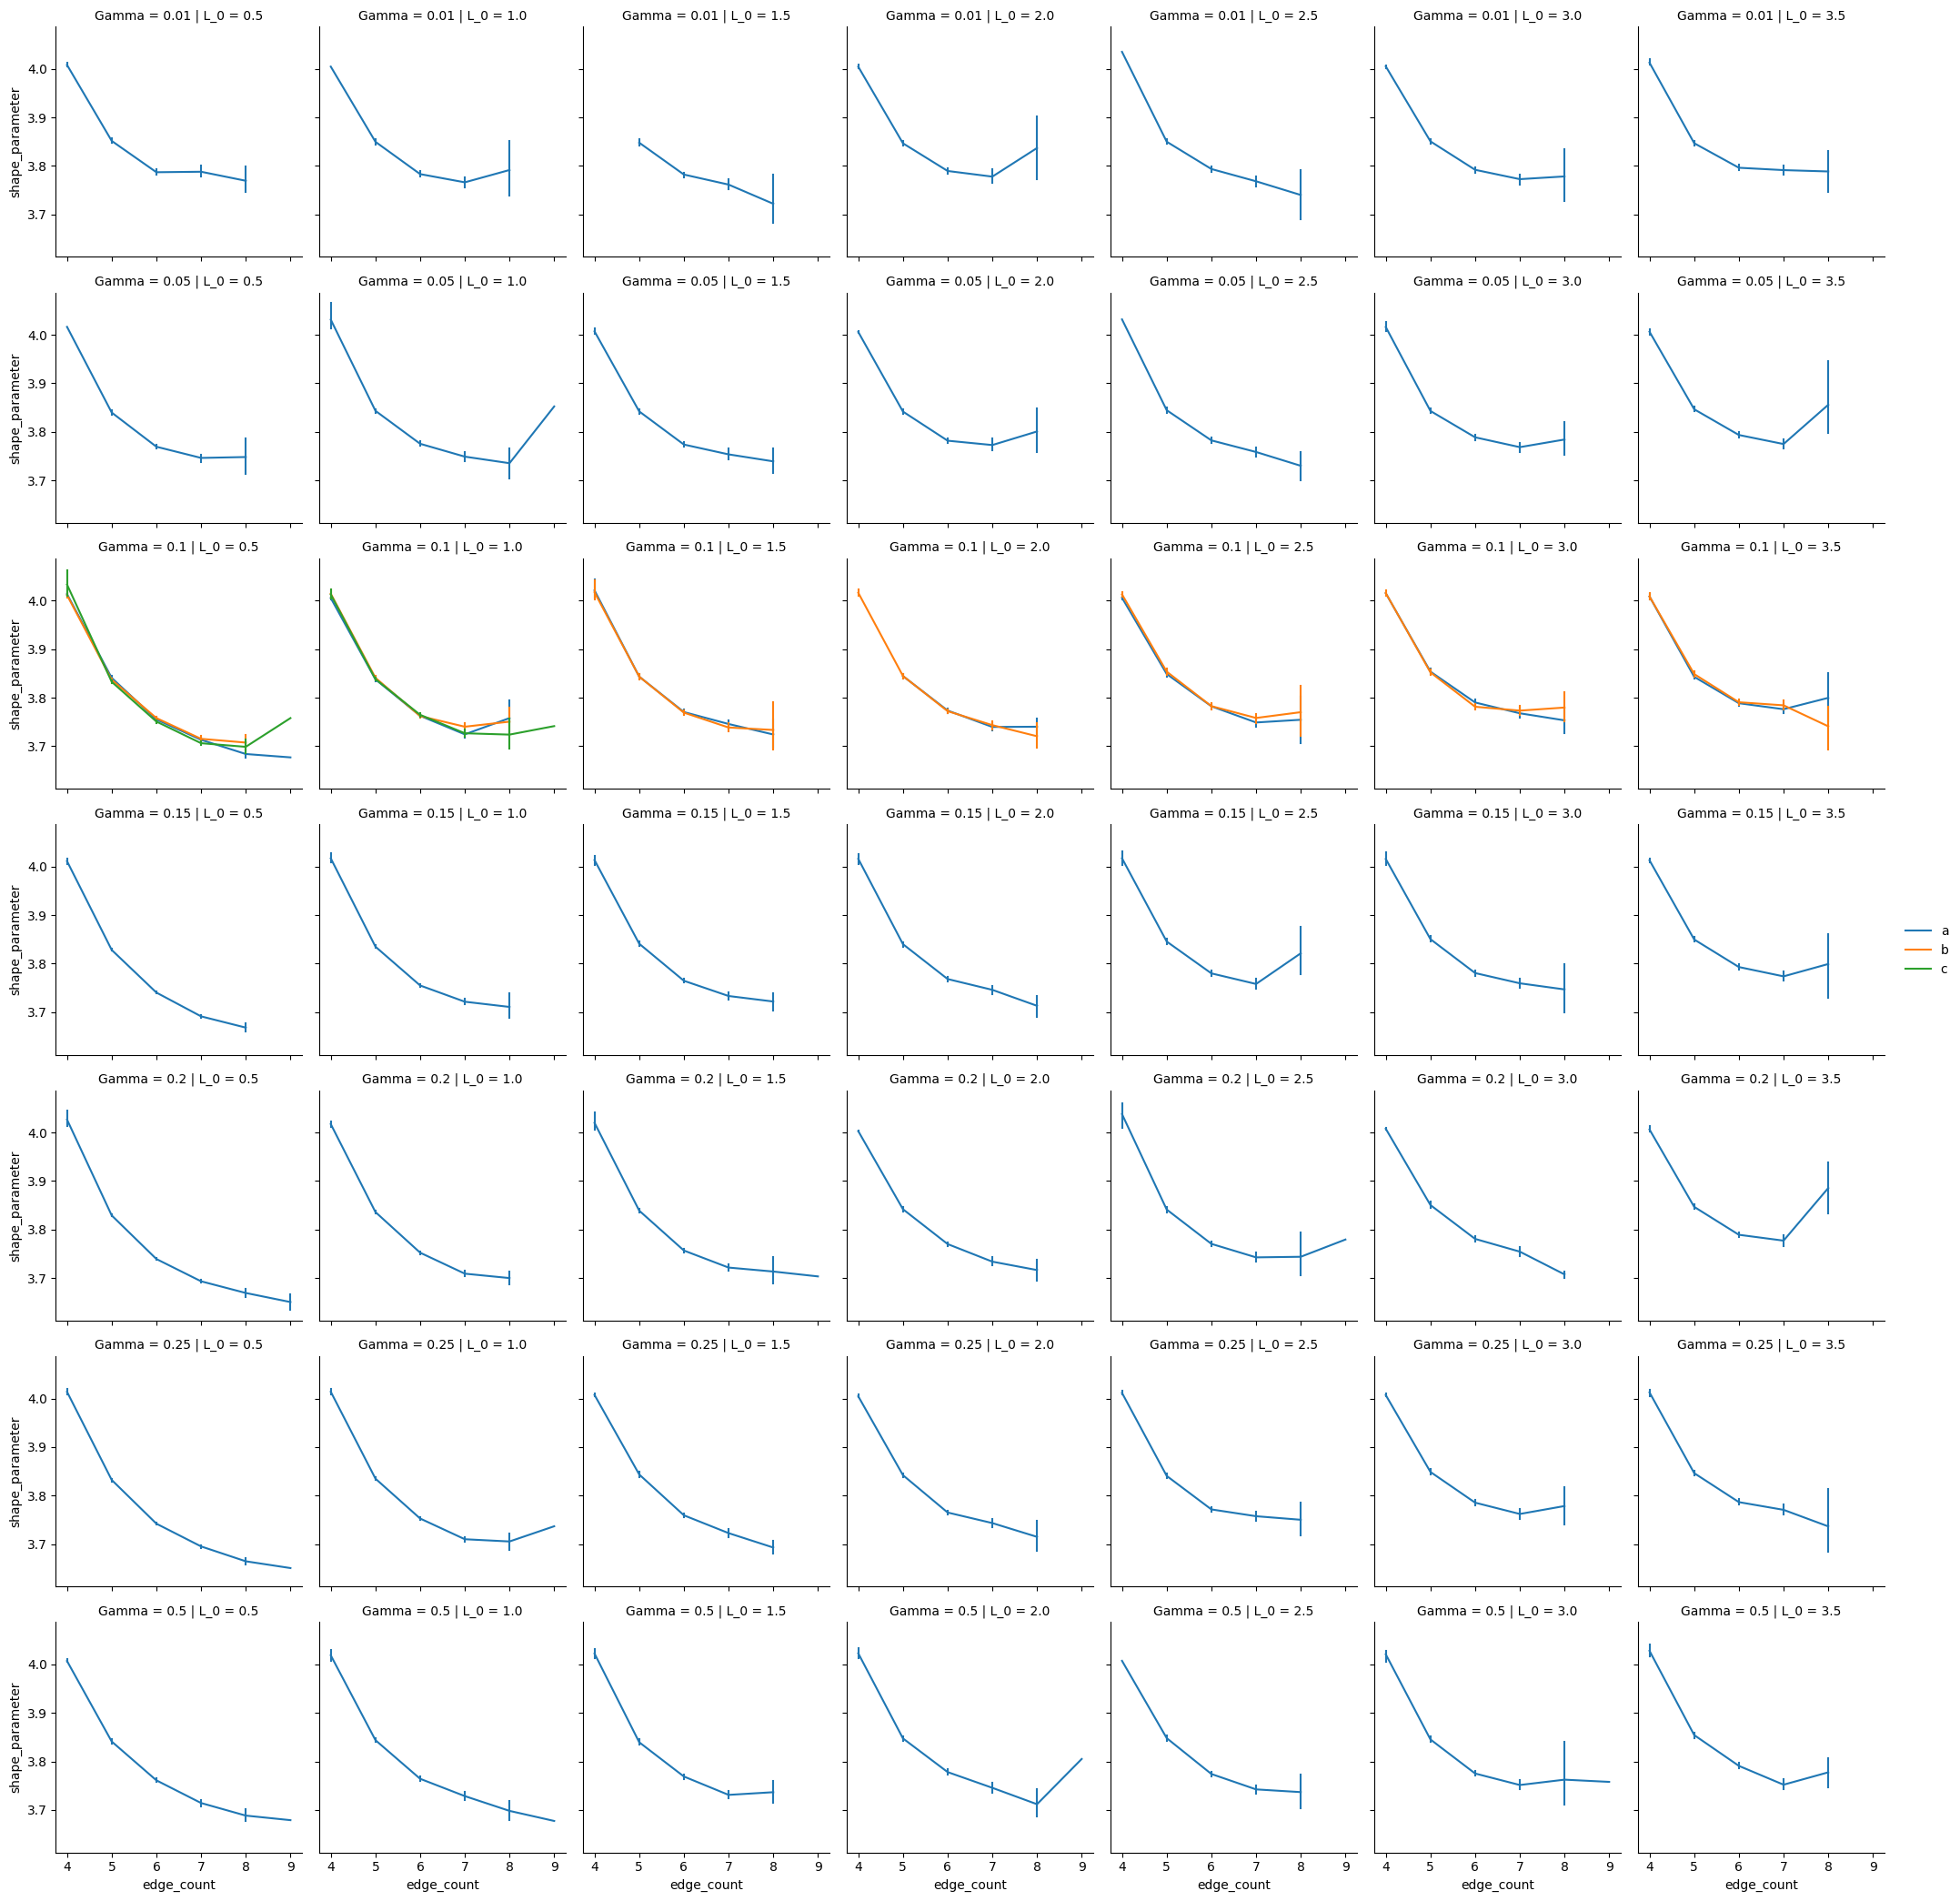

In [17]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.lineplot, x="edge_count", y="shape_parameter", err_style="bars",  hue='sample_set')
g.add_legend()

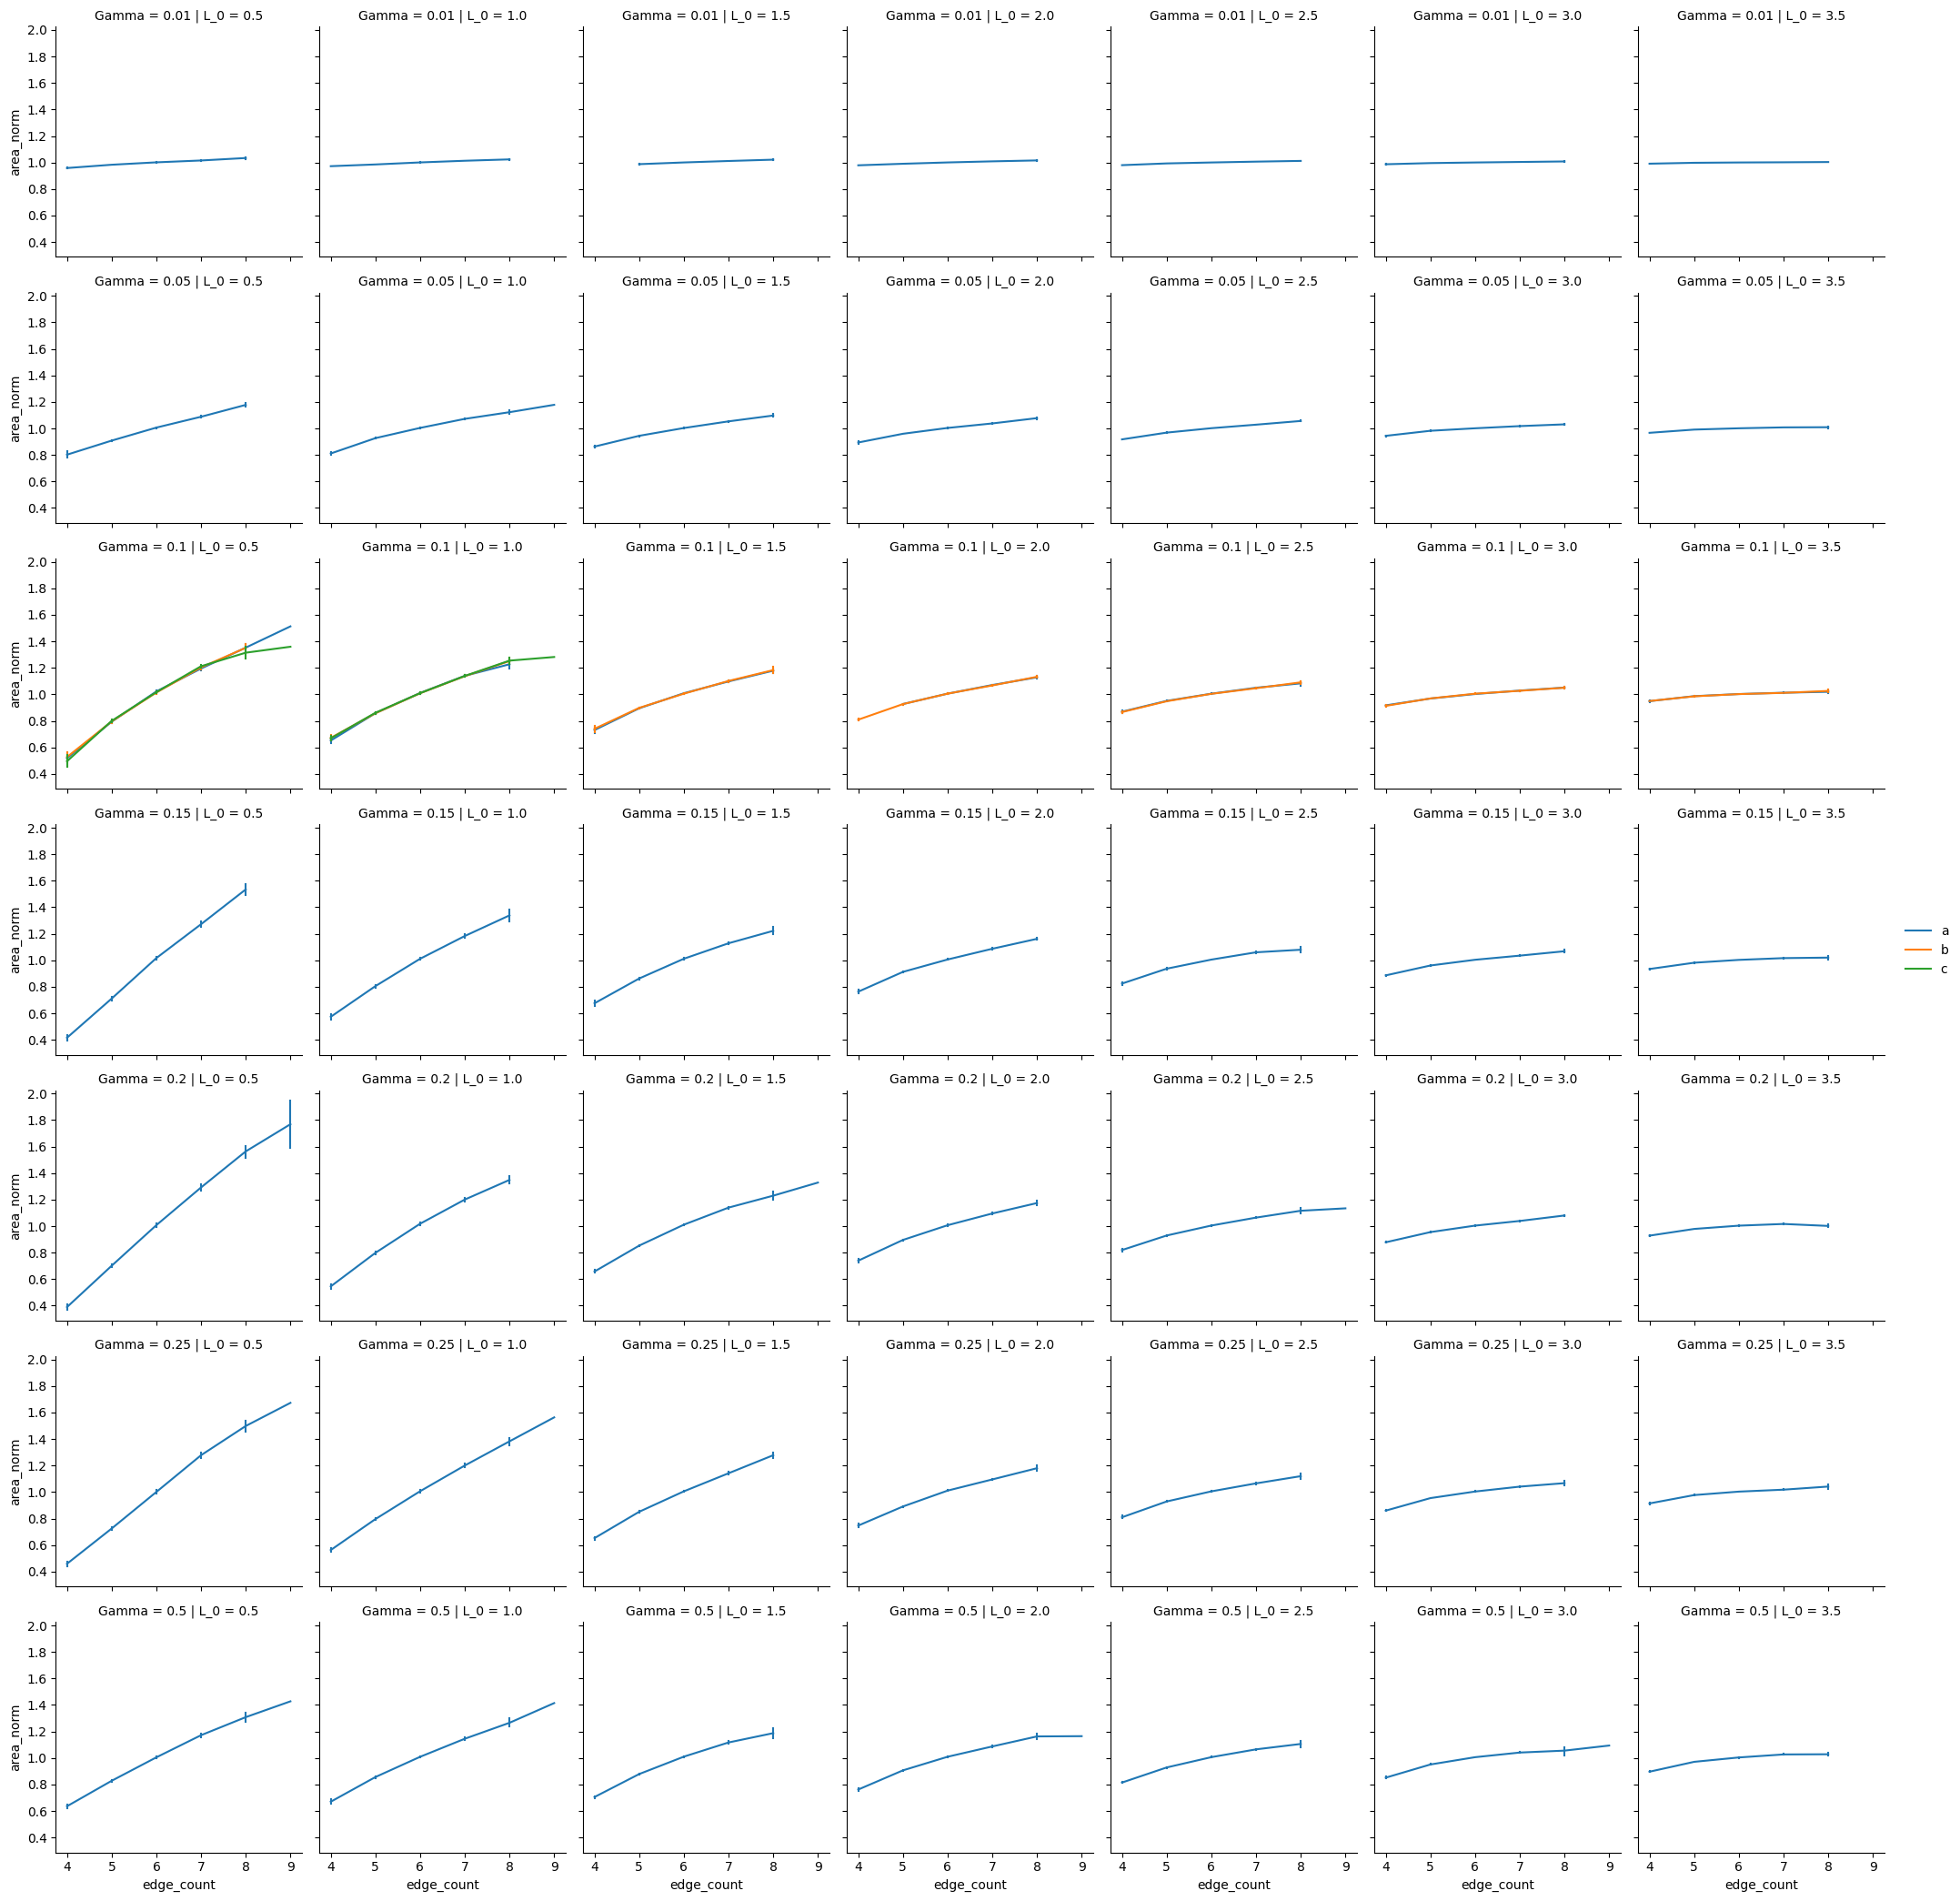

In [18]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.lineplot, x="edge_count", y="area_norm", err_style="bars", hue='sample_set')
g.add_legend()

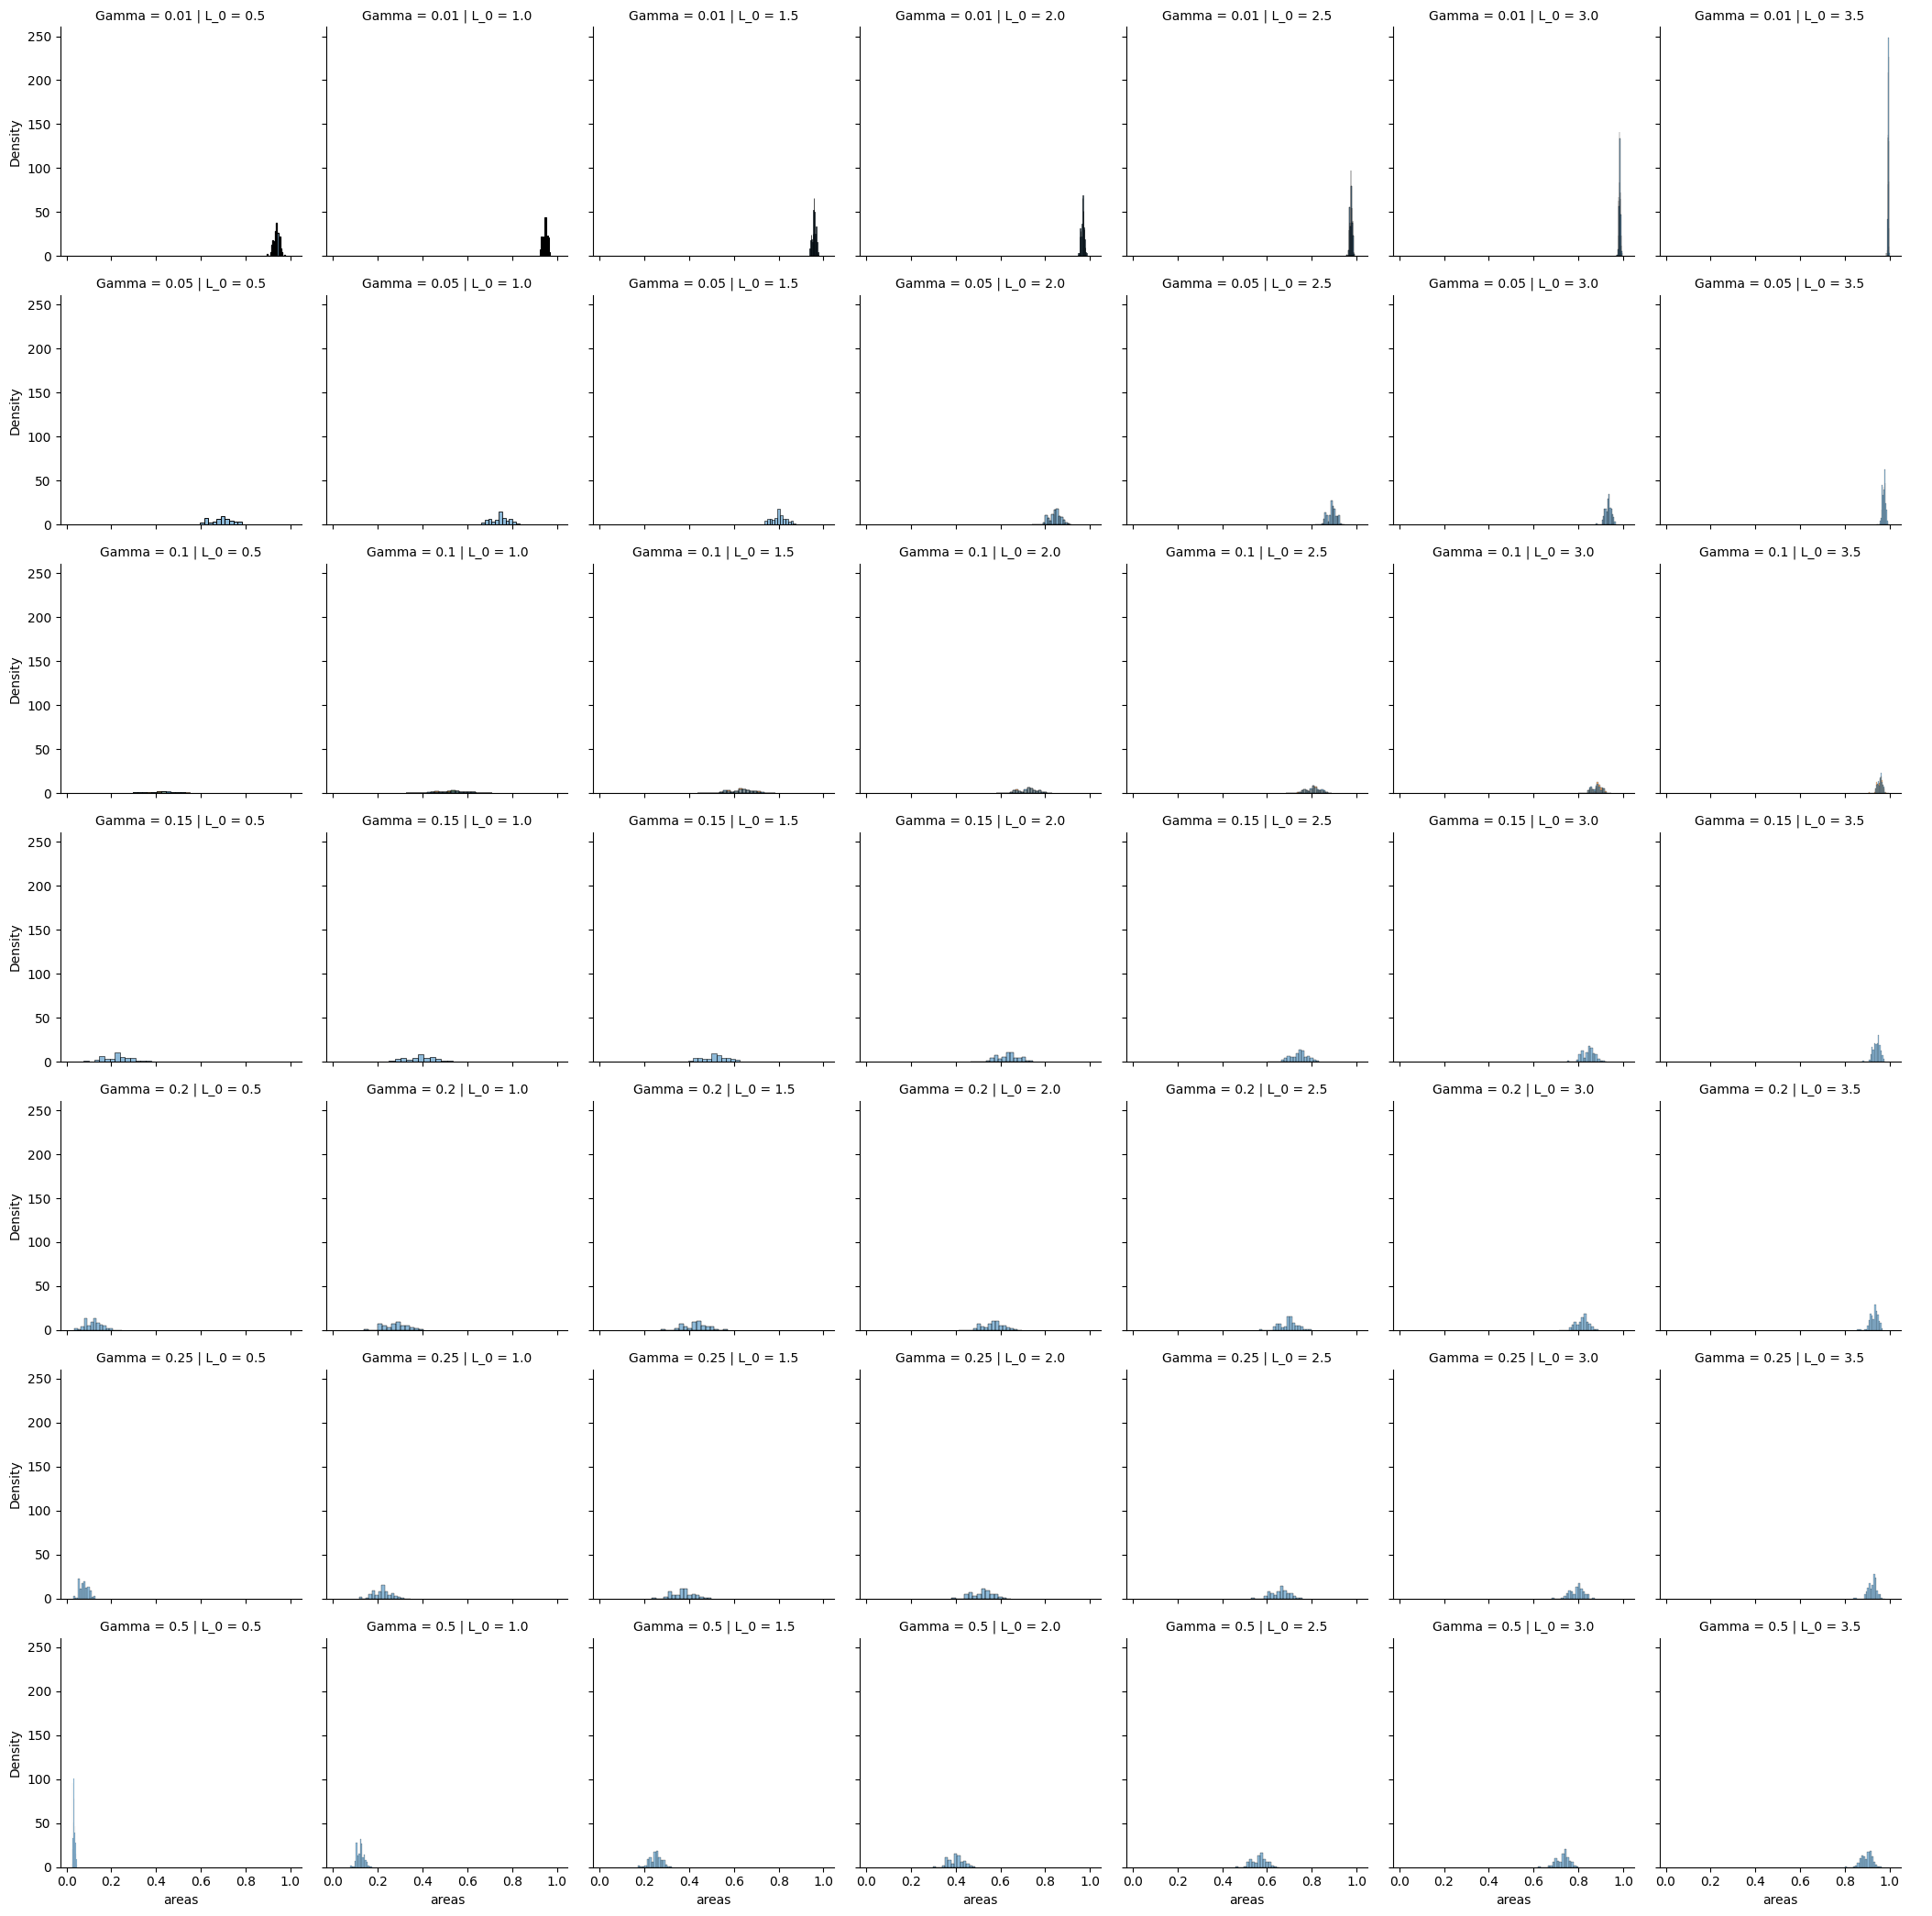

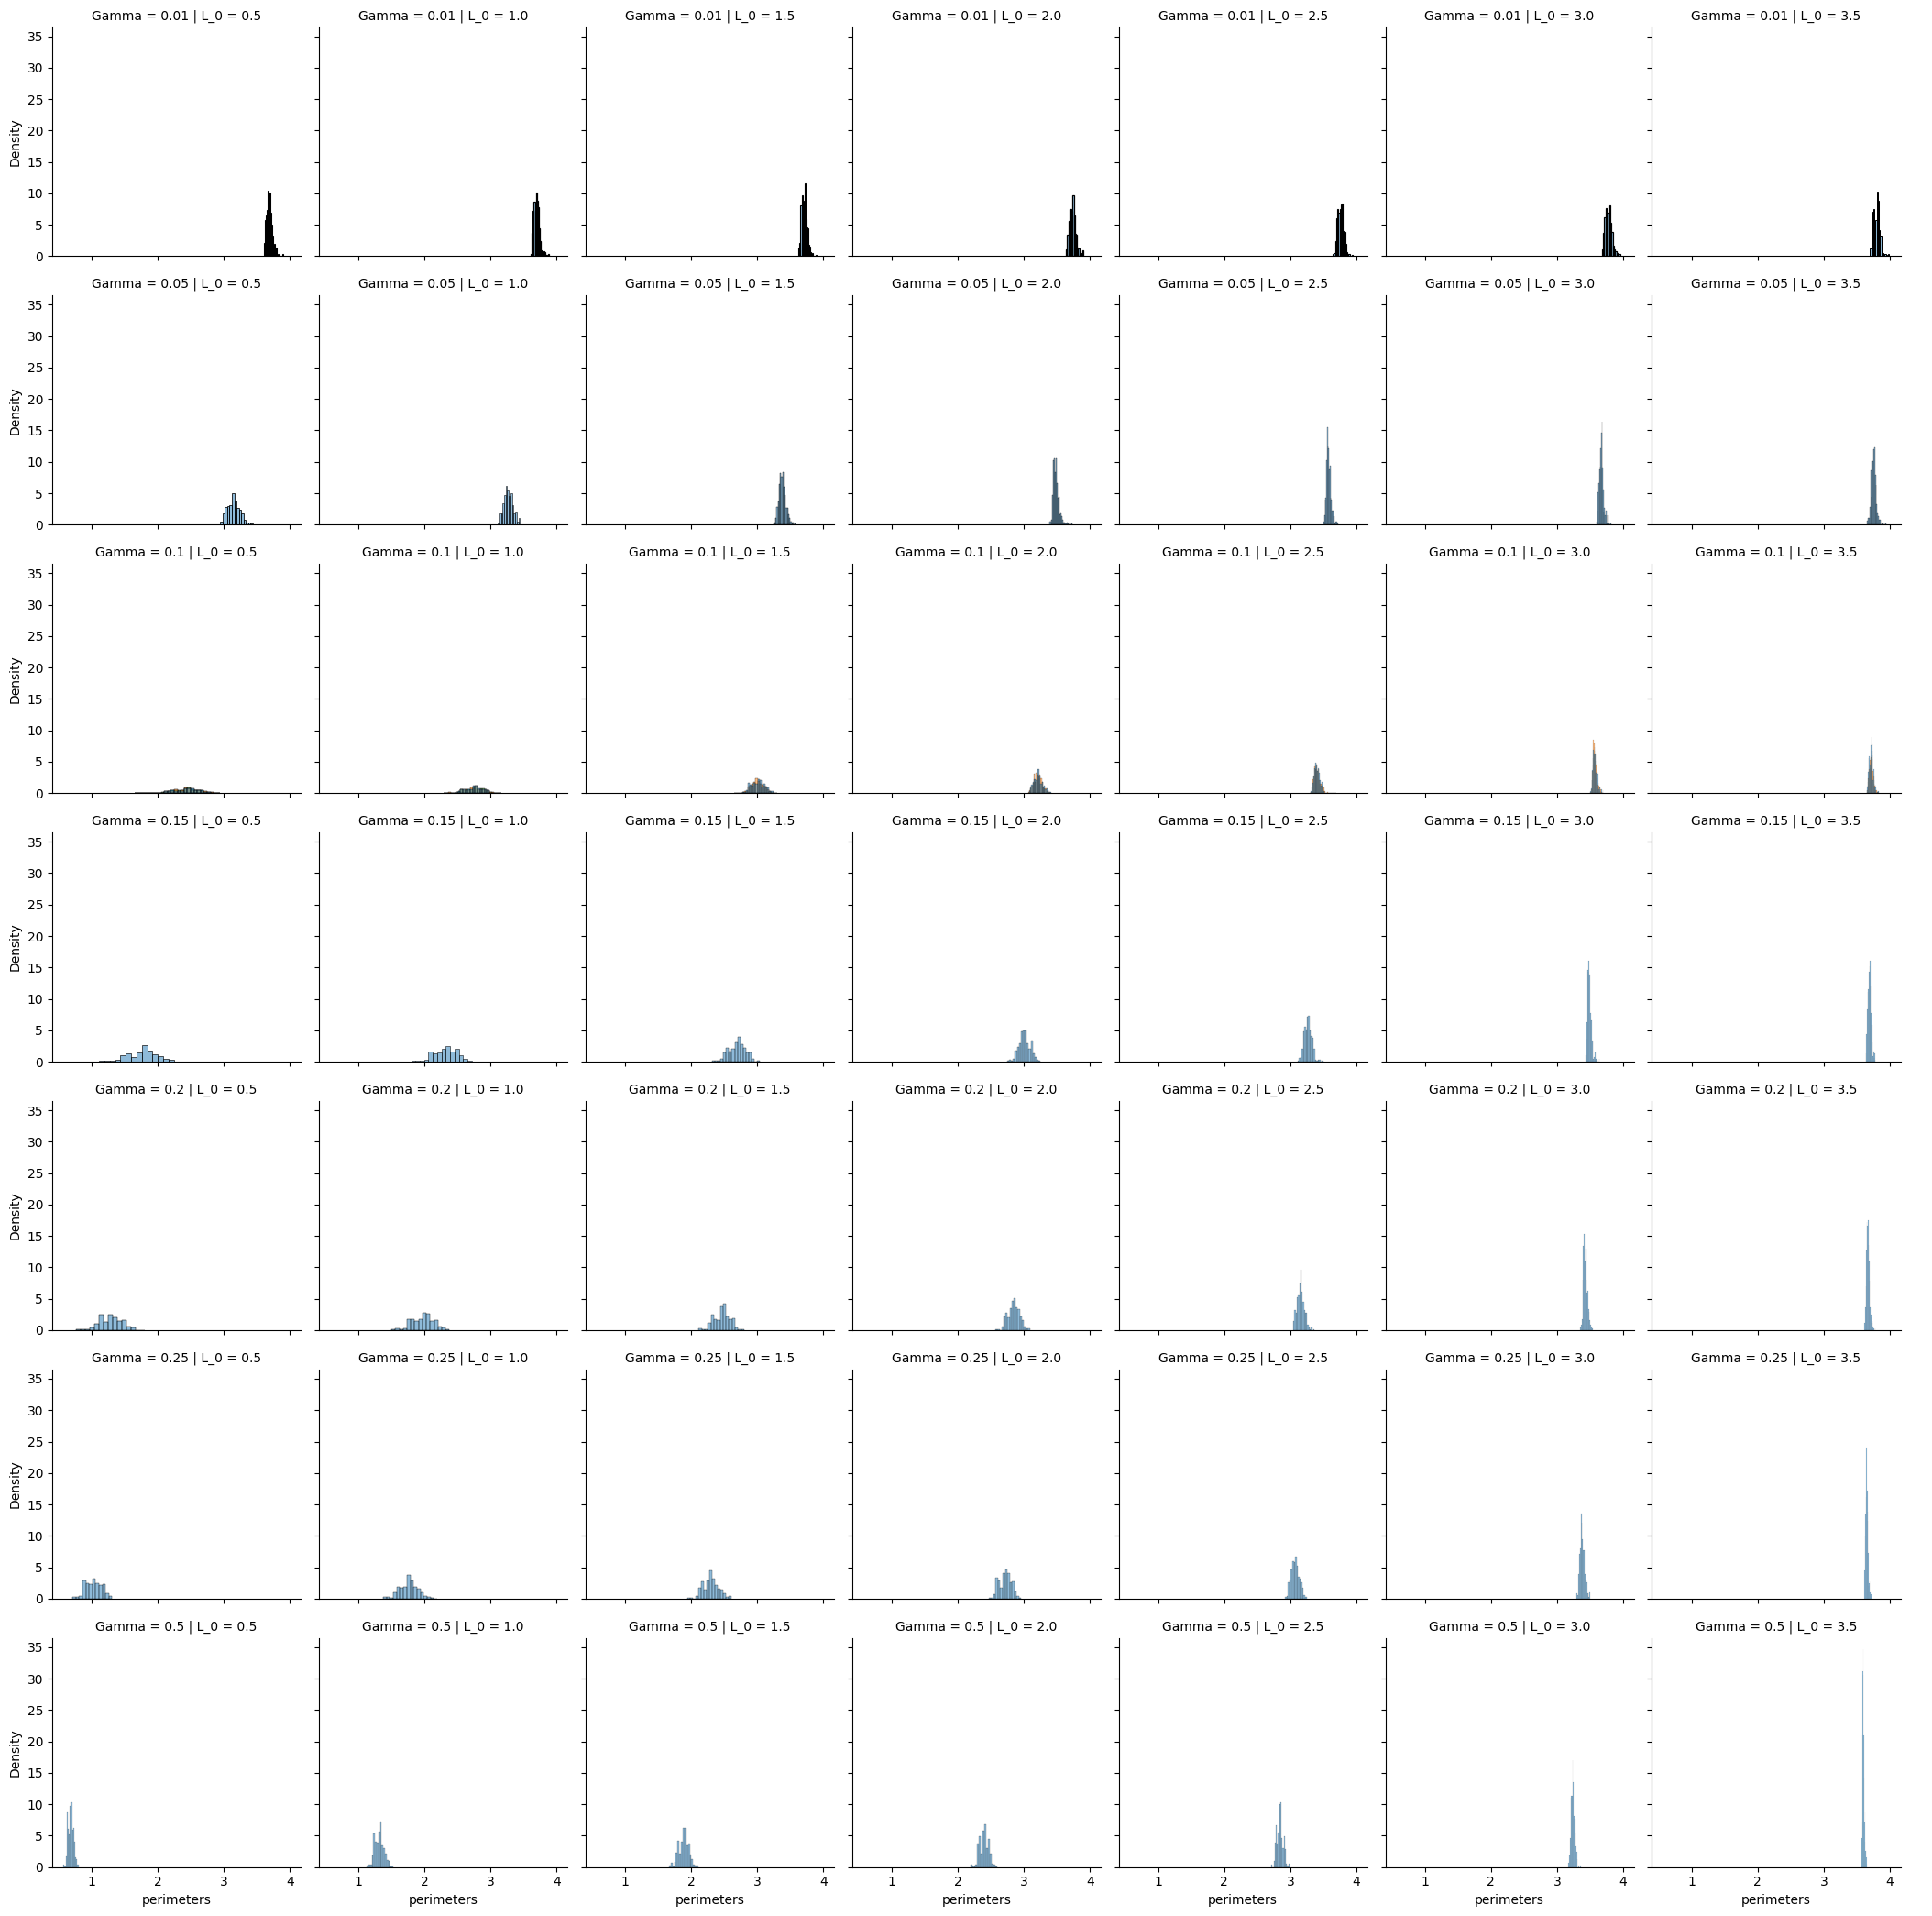

In [19]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.histplot, x="areas", stat='density', hue='sample_set')
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.histplot, x="perimeters", stat='density', hue='sample_set')
g.add_legend()

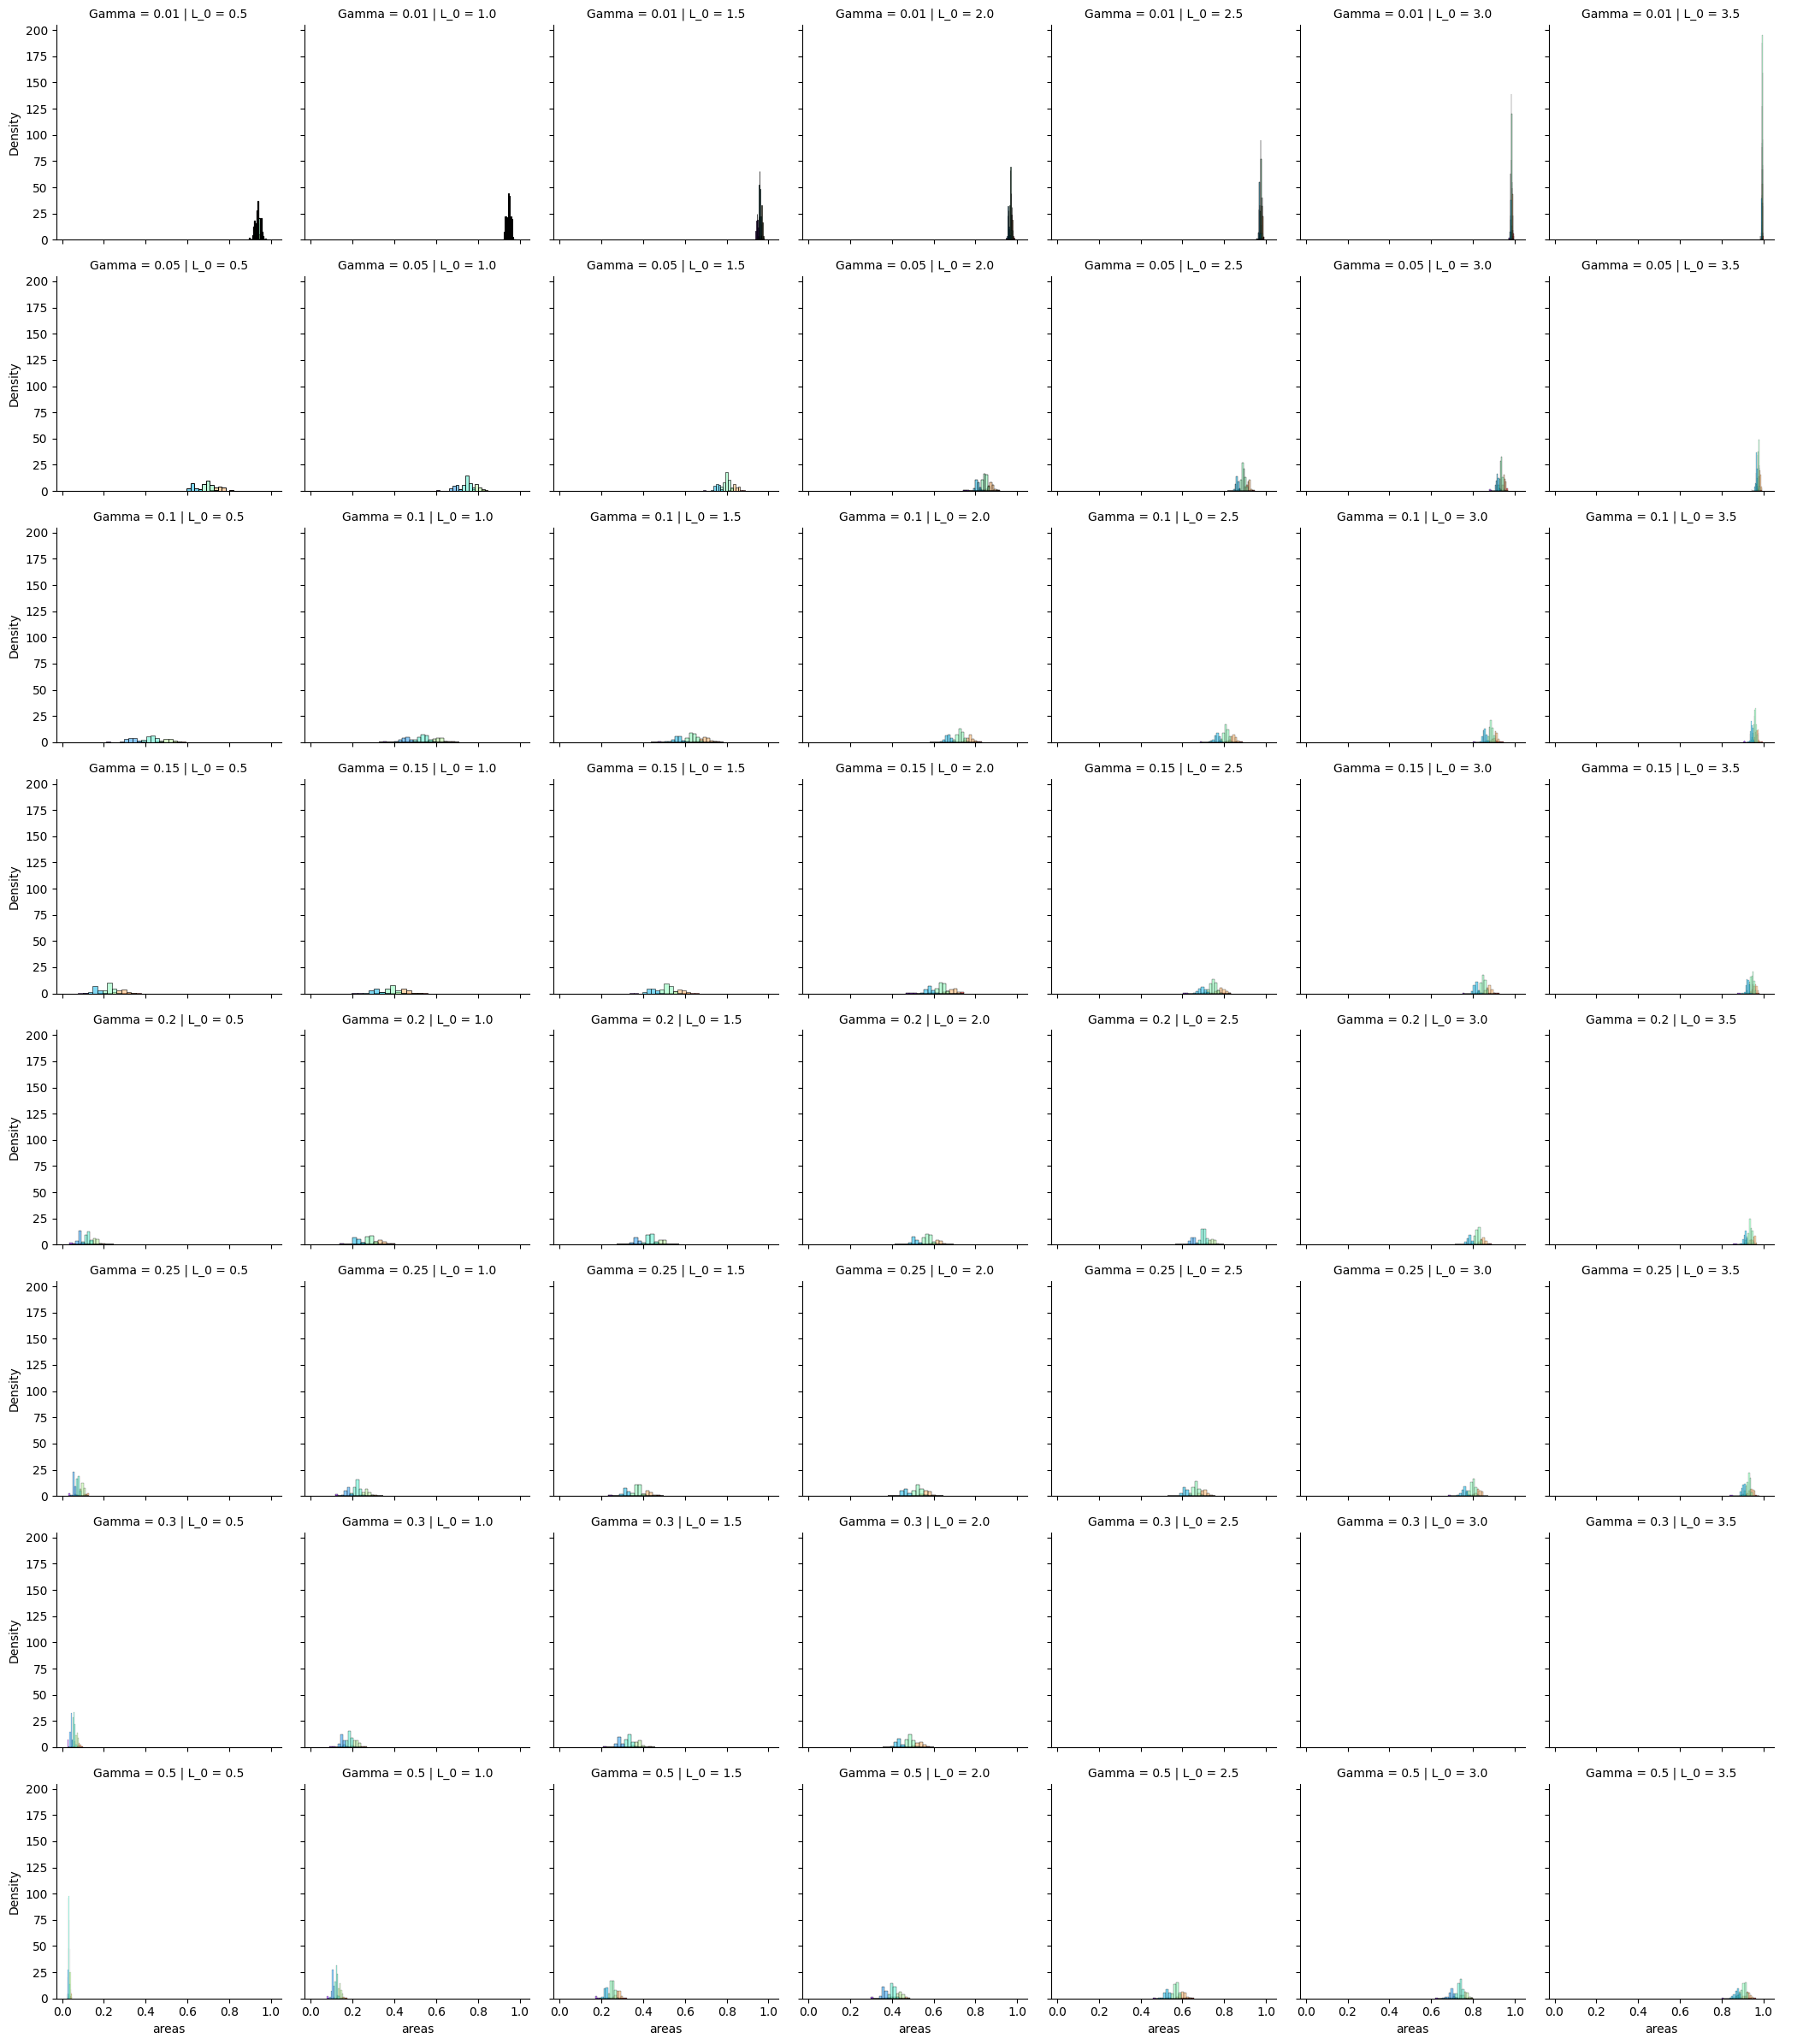

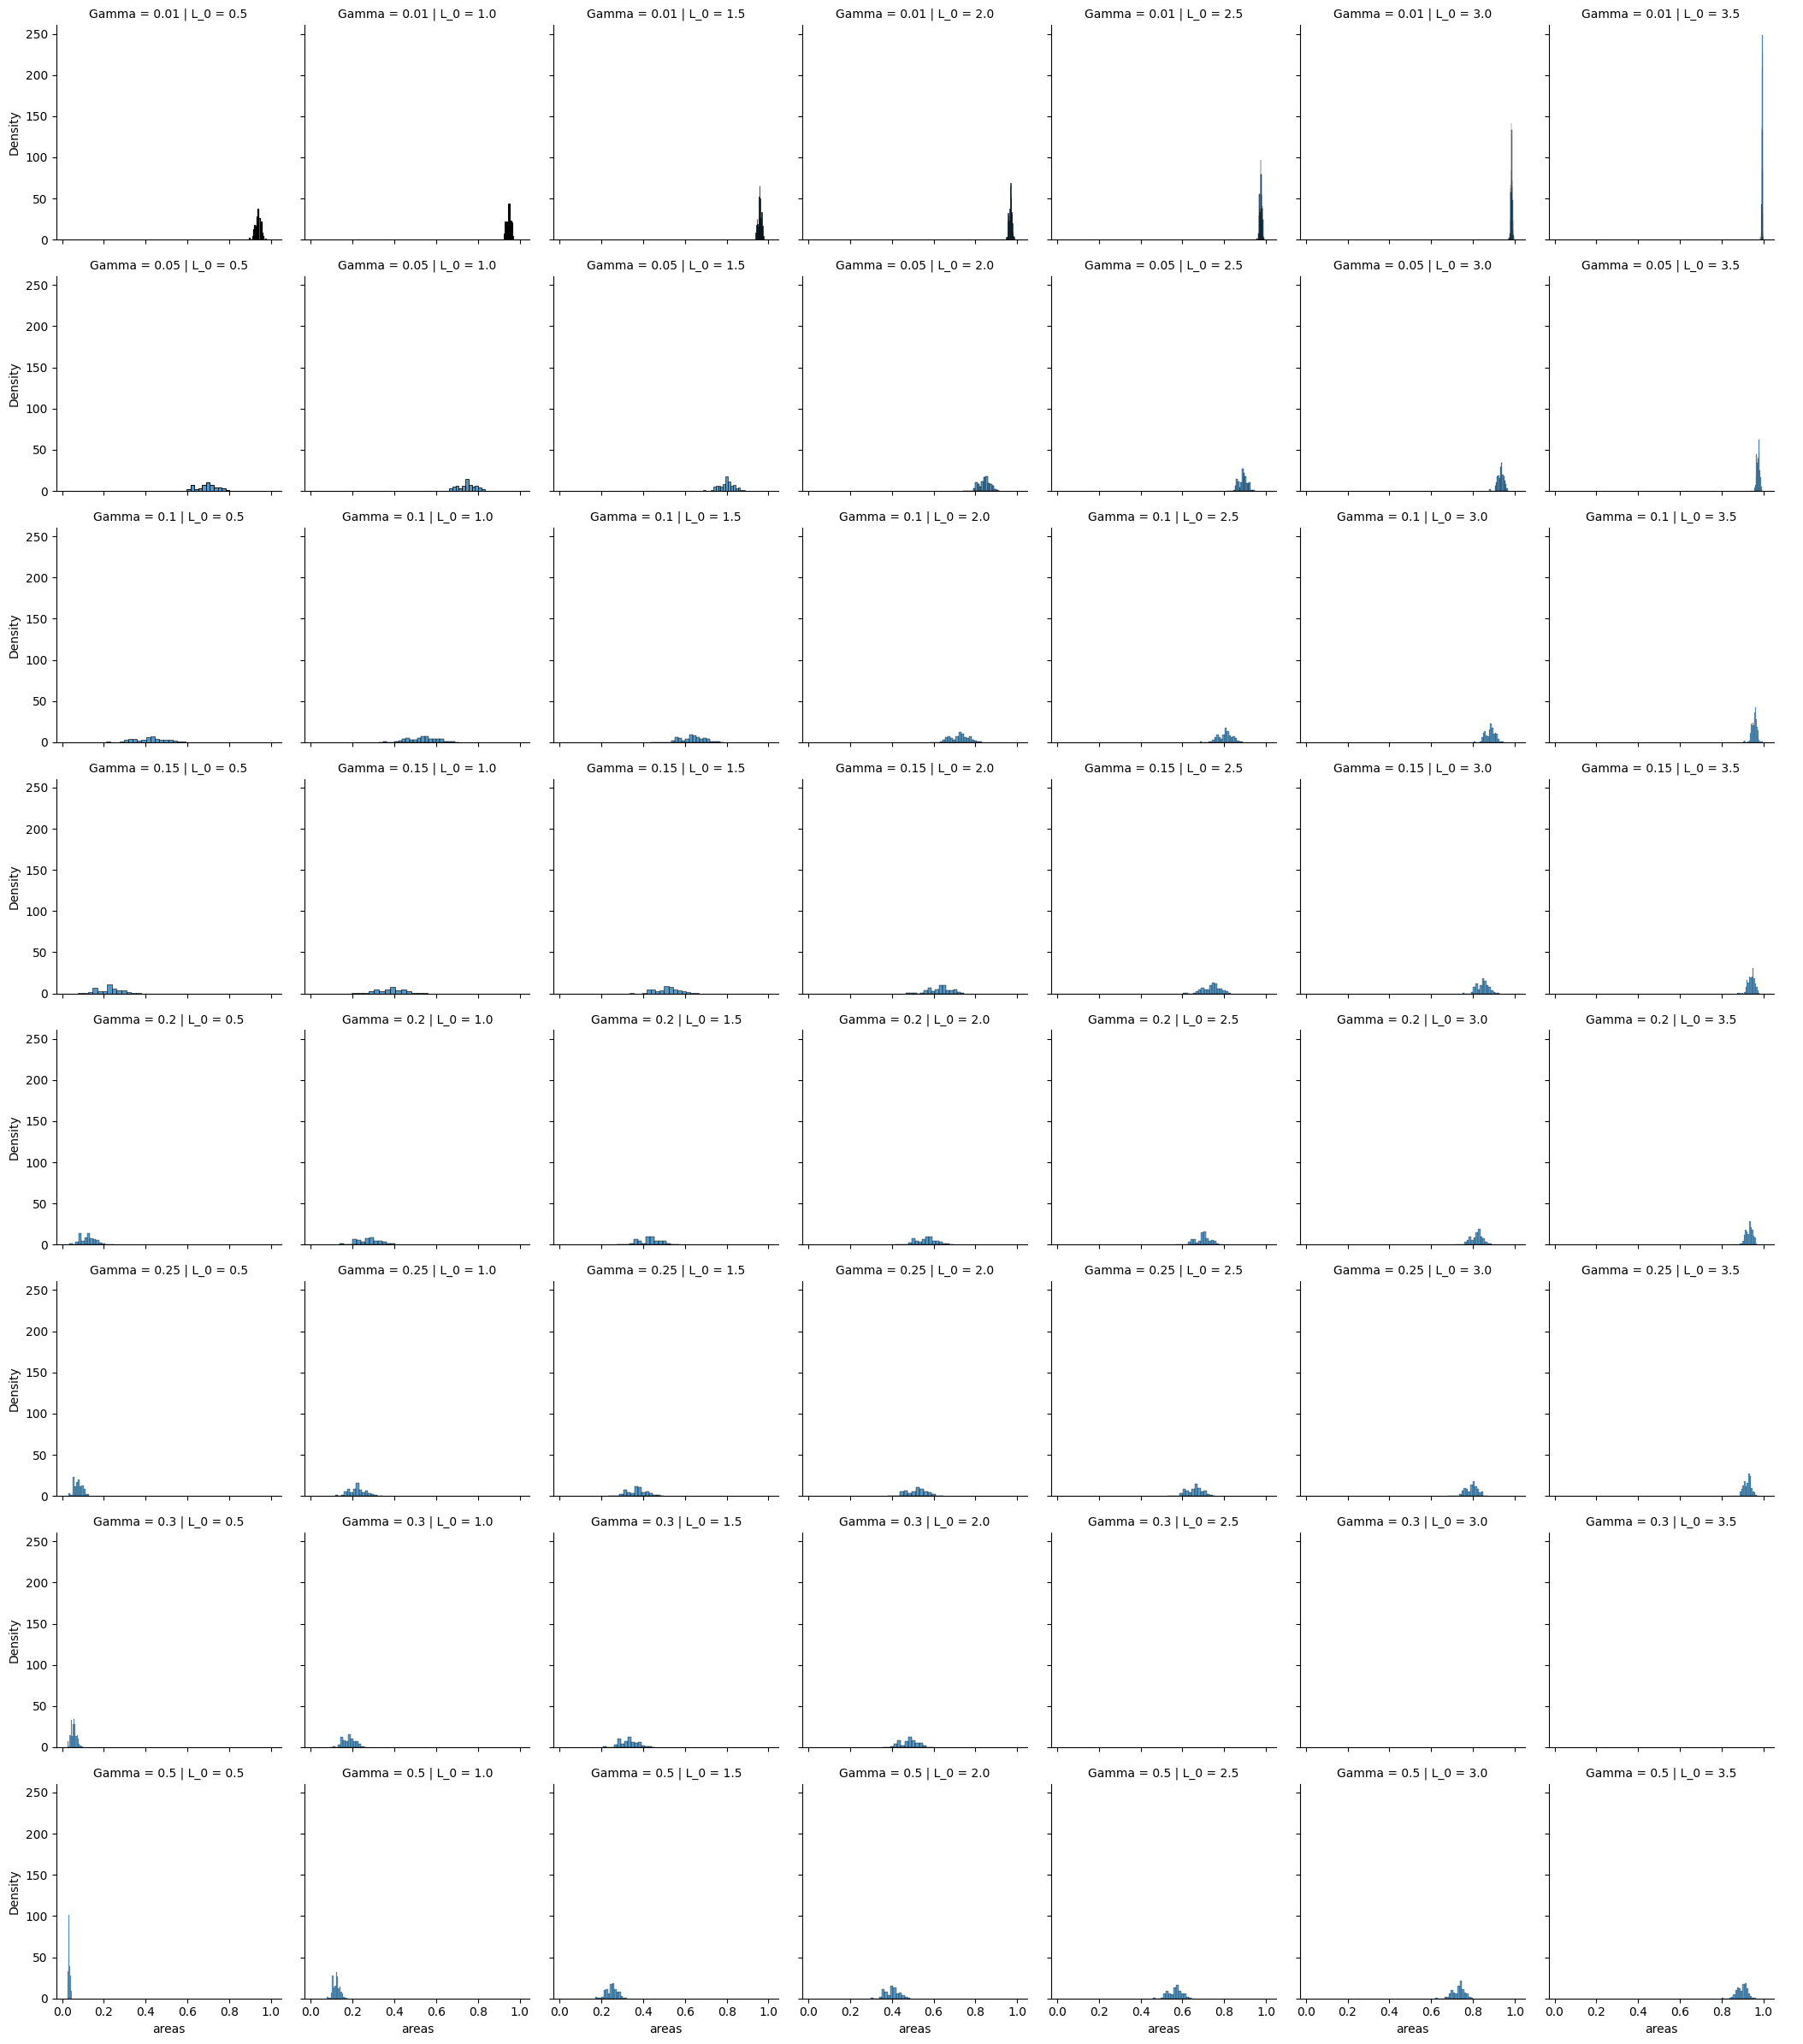

In [102]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.histplot, x="areas", stat='density', hue='edge_count', palette='rainbow')
g.add_legend()
plt.show()
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.histplot, x="areas", stat='density')
g.add_legend()

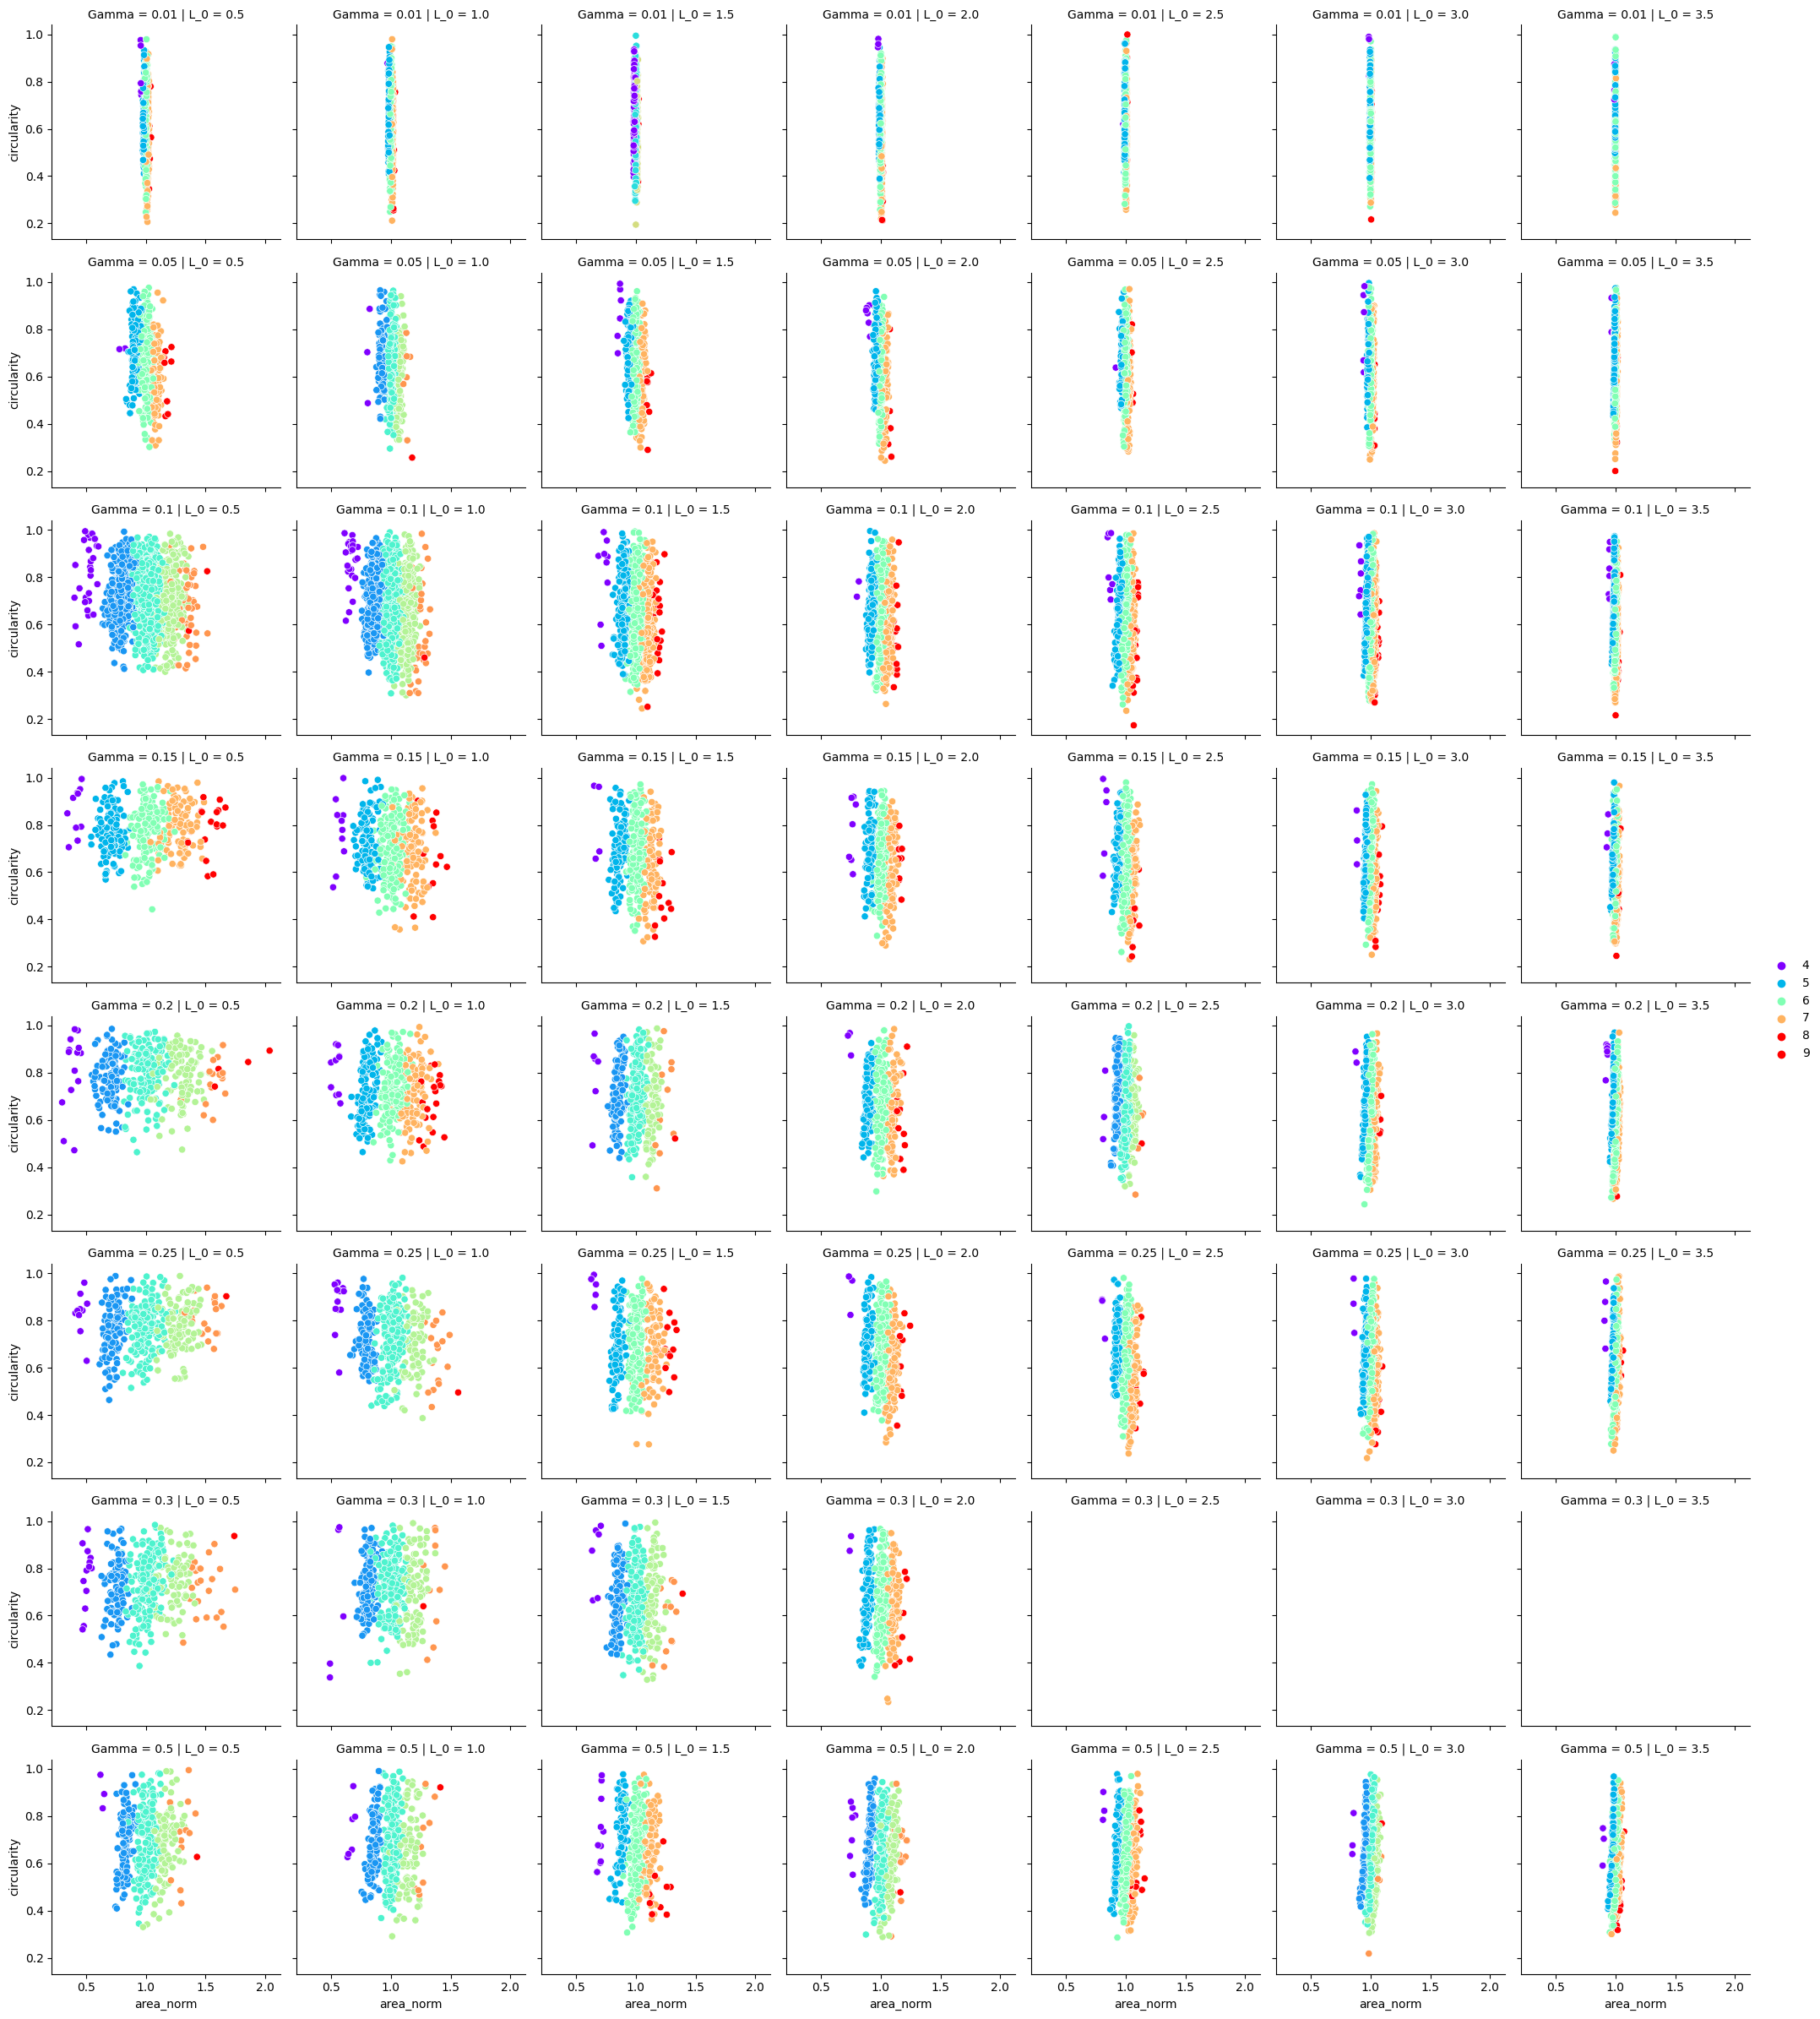

In [103]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.scatterplot, x="area_norm",y='circularity', hue='edge_count', palette='rainbow')
g.add_legend()
plt.show()

<AxesSubplot: xlabel='area_norm_mean', ylabel='circularity'>

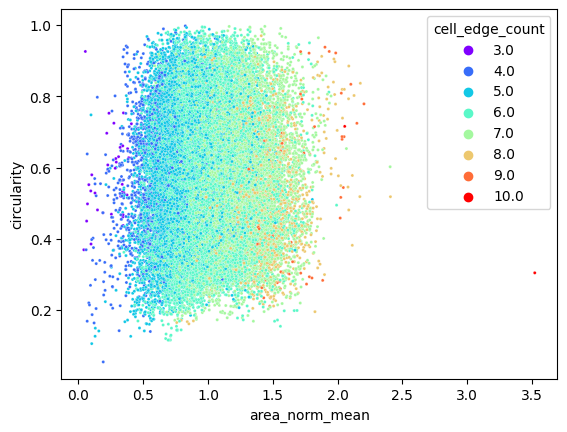

In [107]:
sns.scatterplot(uns_data, x='area_norm_mean', y='circularity', hue='cell_edge_count', palette='rainbow', legend='full', s=5)

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\3940184510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="areas")


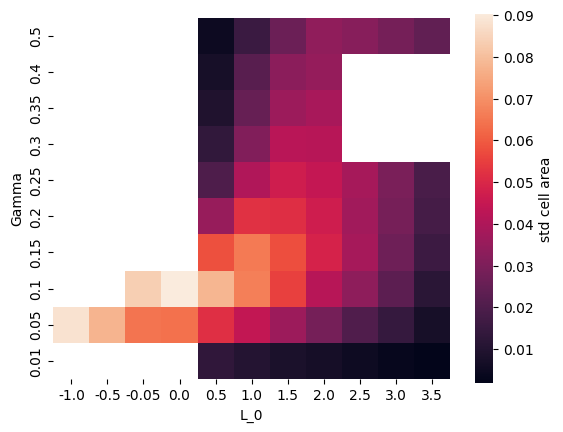

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\3940184510.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="perimeters")


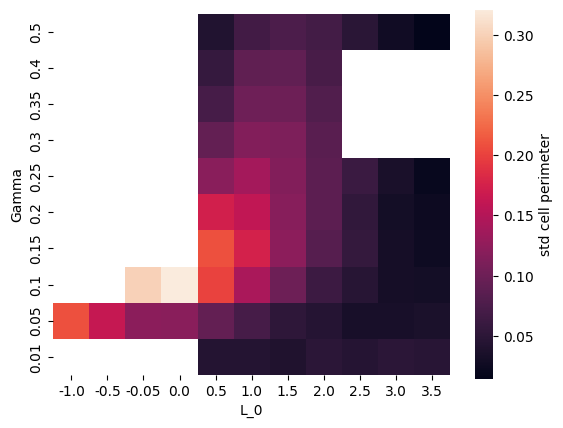

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\3940184510.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")


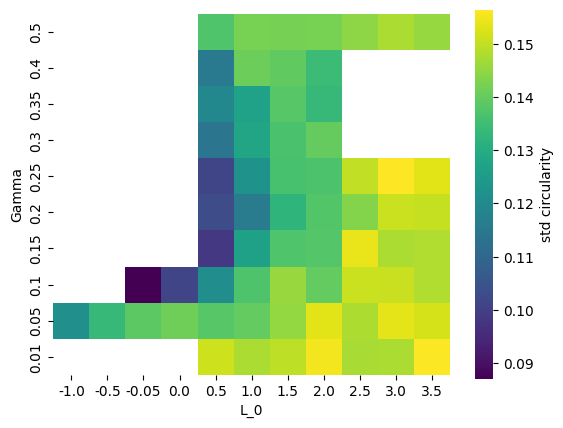

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\3940184510.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df_s.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")


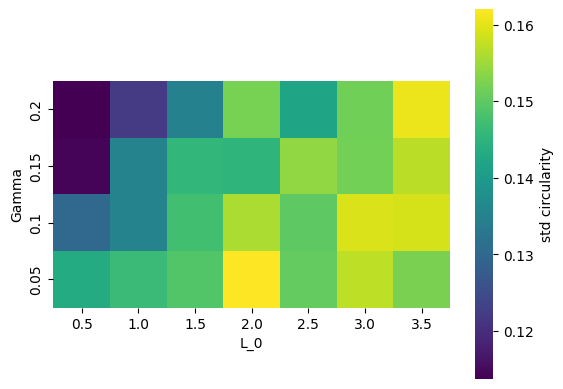

In [4]:
hm=df.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="areas")
g=sns.heatmap(hm, cbar_kws={'label': 'std cell area'},  square=True)
g.invert_yaxis()
plt.show()

hm=df.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="perimeters")
g=sns.heatmap(hm, cbar_kws={'label': 'std cell perimeter'},  square=True)
g.invert_yaxis()
plt.show()

hm=df.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")
g=sns.heatmap(hm, cbar_kws={'label': 'std circularity'},  square=True,  cmap='viridis')
g.invert_yaxis()
plt.show()

hm=df_s.groupby(["L_0", "Gamma"]).std().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")
g=sns.heatmap(hm, cbar_kws={'label': 'std circularity'},  square=True,  cmap='viridis')
g.invert_yaxis()
plt.show()

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\117394367.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="perimeters")


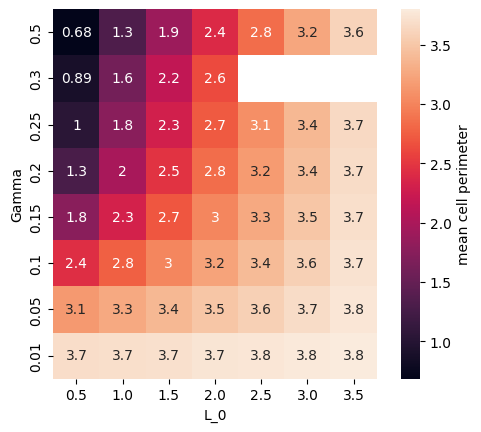

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\117394367.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="perimeters")


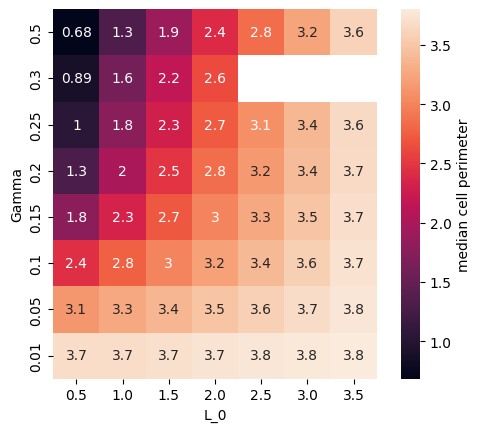

In [95]:
hm=df.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="perimeters")
g=sns.heatmap(hm, cbar_kws={'label': 'mean cell perimeter'}, square=True, annot=True)
g.invert_yaxis()
plt.show()

hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="perimeters")
g=sns.heatmap(hm, cbar_kws={'label': 'median cell perimeter'},  square=True, annot=True)
g.invert_yaxis()
plt.show()

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\2658179953.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="areas")


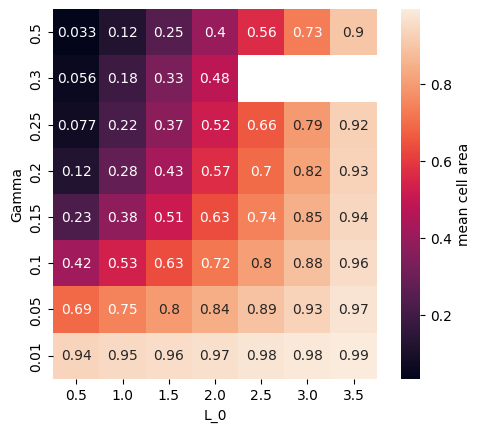

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\2658179953.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="areas")


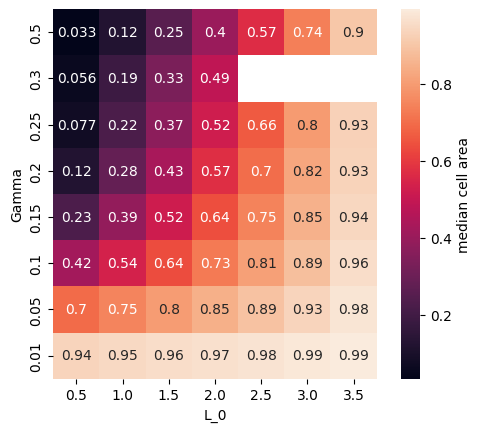

In [96]:
hm=df.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="areas")
g=sns.heatmap(hm, cbar_kws={'label': 'mean cell area'}, square=True, annot=True)
g.invert_yaxis()
plt.show()

hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="areas")
g=sns.heatmap(hm, cbar_kws={'label': 'median cell area'},  square=True, annot=True)
g.invert_yaxis()
plt.show()

In [9]:
df.columns

Index(['areas', 'perimeters', 'edge_count', 'circularity', 'shape_parameter',
       'zeta', 'L_0', 'Gamma', 'sample_set', 'area_norm', 'perimeter_norm',
       'circ_norm'],
      dtype='object')

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\2866410203.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df[(df.Gamma > 0.01) & (df.L_0!=-0.05)].groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="areas")


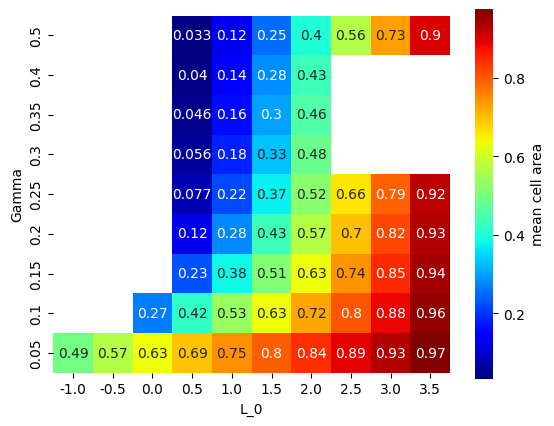

In [10]:
hm=df[(df.Gamma > 0.01) & (df.L_0!=-0.05)].groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="areas")
g=sns.heatmap(hm, cbar_kws={'label': 'mean cell area'}, cmap='jet',square=True, annot=True)
g.invert_yaxis()
plt.show()

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\2644574210.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")


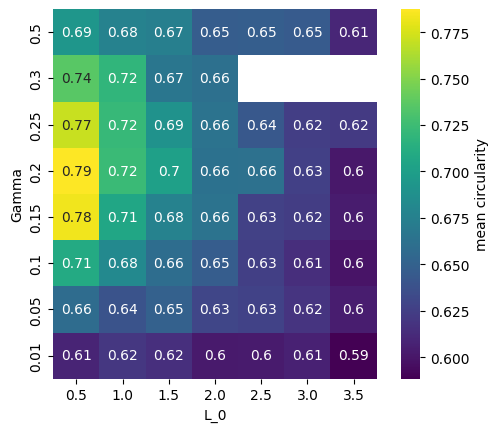

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\2644574210.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df_s.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")


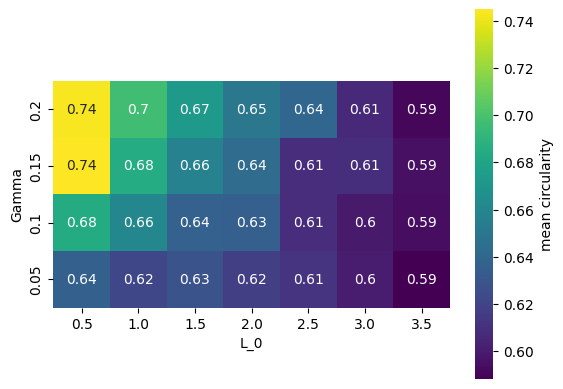

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\2644574210.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")


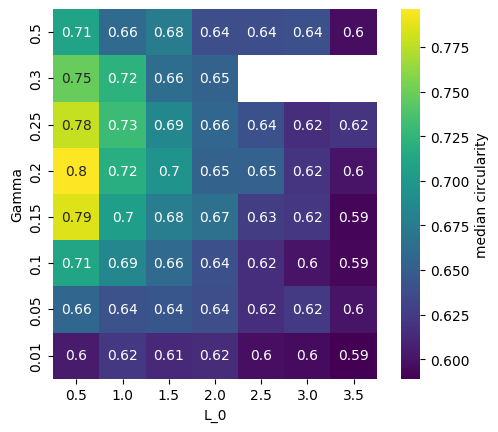

In [97]:
hm=df.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")
g=sns.heatmap(hm, cbar_kws={'label': 'mean circularity'}, cmap="viridis",  square=True, annot=True)
g.invert_yaxis()
plt.show()

hm=df_s.groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")
g=sns.heatmap(hm, cbar_kws={'label': 'mean circularity'}, cmap="viridis",  square=True, annot=True)
g.invert_yaxis()
plt.show()

hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="circularity")
g=sns.heatmap(hm, cbar_kws={'label': 'median circularity'}, cmap="viridis",  square=True, annot=True)
g.invert_yaxis()
plt.show()

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\2150495334.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df[(df.edge_count>4)&(df.edge_count<8)].groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="shape_parameter")


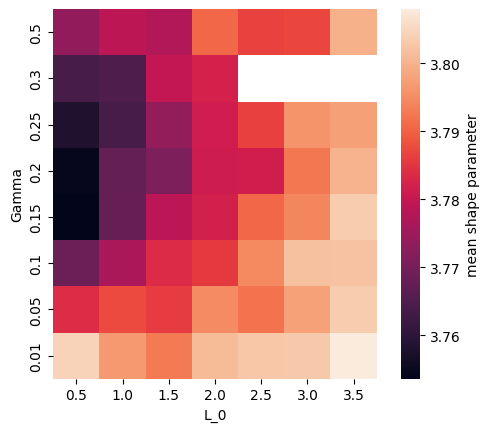

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\2150495334.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="shape_parameter")


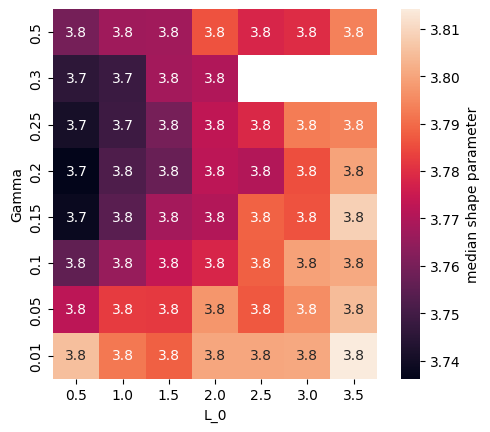

In [98]:
hm=df[(df.edge_count>4)&(df.edge_count<8)].groupby(["L_0", "Gamma"]).mean().reset_index().pivot(index="Gamma", columns="L_0", values="shape_parameter")
g=sns.heatmap(hm, cbar_kws={'label': 'mean shape parameter'},  square=True)
g.invert_yaxis()
plt.show()

hm=df.groupby(["L_0", "Gamma"]).median().reset_index().pivot(index="Gamma", columns="L_0", values="shape_parameter")
g=sns.heatmap(hm, cbar_kws={'label': 'median shape parameter'},  square=True, annot=True)
g.invert_yaxis()
plt.show()

In [99]:
uns_data.columns

Index(['index', 'cell_id_old', 'cell_perimeter_microns', 'cell_area_microns',
       'shape_parameter', 'circularity', 'cell_edge_count',
       'major_shape_axis_alignment_rads', 'cc_x', 'cc_y', 'cell_id_new',
       'spot_id', 'time', 'tm_frame', 'cell_perimeter_nd', 'cell_area_nd',
       'cell_P_eff_nd', 'cell_shear', 'cell_zeta',
       'major_stress_axis_alignment_rads', 'parent_id', 'divisions',
       'angle_horizontal', 'circ_J', 'circ_P', 'circ_A', 'shape_axis_J',
       'shape_axis_P', 'shape_axis_A', 'nn_order', 'nn_order_2', 'order_all',
       'mean_cc_distance', 'mean_cc_distance_2', 'experiment', 'stretch_type',
       'state', 'area_norm', 'perimeter_norm', 'first_frame', 'last_frame',
       'area_norm_mean', 'area_norm_last', 'circ_norm', 'circ_norm_last',
       'aligned_time', 'aligned_time_back', 'circ_norm_mean', 'circ_std'],
      dtype='object')

In [5]:
cell_data=pd.read_csv("C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track/Output/long_tracked_cell_data_pooled.csv")

In [6]:
cell_data['circ_norm_mean']=cell_data.circularity/cell_data.groupby(['experiment', 'time']).circularity.transform('mean')

In [7]:
full_dat['area_norm_mean']=full_dat.cell_area_microns/full_dat.groupby(['experiment', 'time']).cell_area_microns.transform('mean')

In [15]:
uns_data=cell_data[(cell_data.stretch_type=='u')|(cell_data.time==0)]

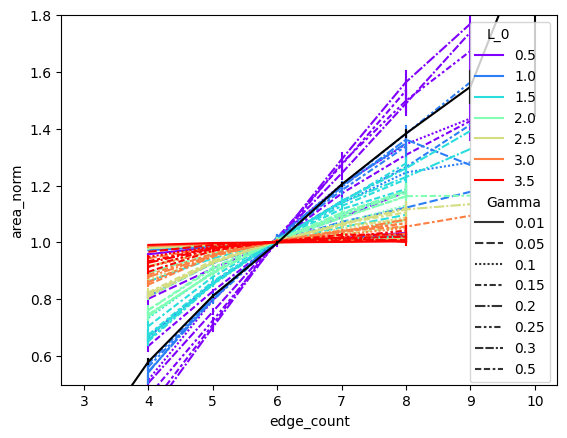

(0.5, 1.8)

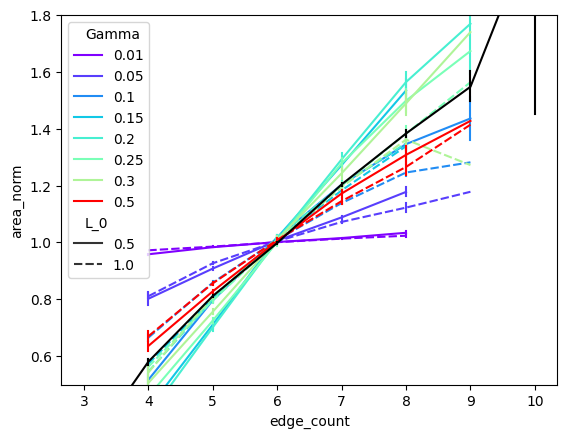

In [100]:
sns.lineplot(df, x='edge_count', y='area_norm', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")

sns.lineplot(uns_data, x='cell_edge_count', y='area_norm_mean', color='black', err_style="bars")

plt.ylim(0.5, 1.8)

plt.show()
sns.lineplot(df[(df.L_0<1.5)], x='edge_count', y='area_norm', style="L_0", hue='Gamma', palette='rainbow', err_style="bars", legend='full')

sns.lineplot(uns_data, x='cell_edge_count', y='area_norm_mean', color='black', err_style="bars")

plt.ylim(0.5, 1.8)

<AxesSubplot: xlabel='edge_count', ylabel='circularity'>

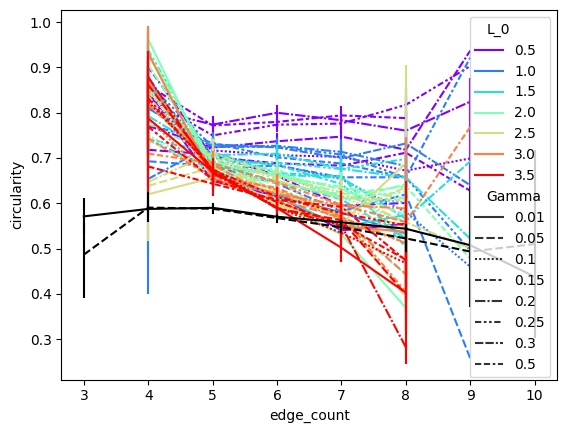

In [101]:
sns.lineplot(df, x='edge_count', y='circularity', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")

sns.lineplot(uns_data, x='cell_edge_count', y='circularity', color='black', err_style="bars")
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='circularity', color='black', linestyle='--',err_style="bars")

<AxesSubplot: xlabel='edge_count', ylabel='circ_norm'>

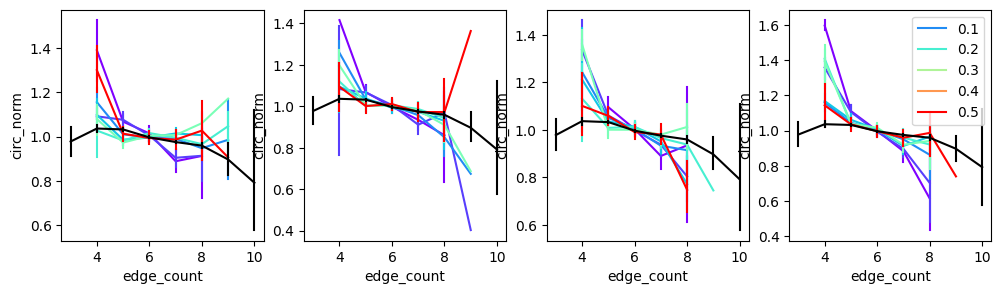

In [55]:
fig, ax=plt.subplots(1,4, figsize=(12,3))

sns.lineplot(df[df.L_0==0.5],ax=ax[0], x='edge_count', y='circ_norm', hue='Gamma', palette='rainbow', err_style="bars", legend=False)
sns.lineplot(df[df.L_0==1.0],ax=ax[1], x='edge_count', y='circ_norm', hue='Gamma', palette='rainbow', err_style="bars", legend=False)
sns.lineplot(df[df.L_0==1.5],ax=ax[2], x='edge_count', y='circ_norm', hue='Gamma', palette='rainbow', err_style="bars", legend=False)
sns.lineplot(df[df.L_0==2.0],ax=ax[3], x='edge_count', y='circ_norm', hue='Gamma', palette='rainbow', err_style="bars")
#sns.lineplot(df[df.L_0==2.5],ax=ax[4], x='edge_count', y='circ_norm', hue='Gamma', palette='rainbow', err_style="bars", legend=False)
#sns.lineplot(df[df.L_0==3.0],ax=ax[5], x='edge_count', y='circ_norm', hue='Gamma', palette='rainbow', err_style="bars", legend=False)
#sns.lineplot(df[df.L_0==3.5],ax=ax[6], x='edge_count', y='circ_norm', hue='Gamma', palette='rainbow', err_style="bars")

sns.lineplot(uns_data, ax=ax[0],x='cell_edge_count', y='circ_norm_mean', color='black', err_style="bars")
sns.lineplot(uns_data, ax=ax[1],x='cell_edge_count', y='circ_norm_mean', color='black', err_style="bars")
sns.lineplot(uns_data, ax=ax[2],x='cell_edge_count', y='circ_norm_mean', color='black', err_style="bars")
sns.lineplot(uns_data, ax=ax[3],x='cell_edge_count', y='circ_norm_mean', color='black', err_style="bars")
#sns.lineplot(uns_data, ax=ax[4],x='cell_edge_count', y='circ_norm_mean', color='black', err_style="bars")
#sns.lineplot(uns_data, ax=ax[5],x='cell_edge_count', y='circ_norm_mean', color='black', err_style="bars")
#sns.lineplot(uns_data, ax=ax[6],x='cell_edge_count', y='circ_norm_mean', color='black', err_style="bars")


In [68]:
df['circ_std']=df.groupby(['Gamma', 'L_0', 'edge_count']).circularity.transform('std')
uns_data['circ_std']=uns_data.groupby(['experiment', 'time', 'cell_edge_count']).circularity.transform('std')

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_23940\519846417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uns_data['circ_std']=uns_data.groupby(['experiment', 'time', 'cell_edge_count']).circularity.transform('std')


<AxesSubplot: xlabel='edge_count', ylabel='circ_std'>

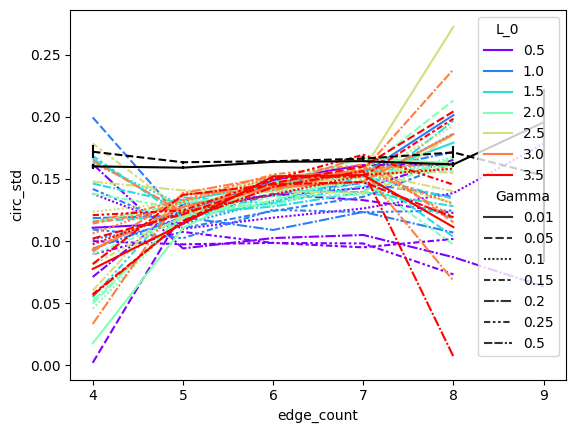

In [69]:
sns.lineplot(df, x='edge_count', y='circ_std', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")

sns.lineplot(uns_data, x='cell_edge_count', y='circ_std', color='black', err_style="bars")
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='circ_std', color='black', linestyle='--',err_style="bars")

<AxesSubplot: xlabel='edge_count', ylabel='circularity'>

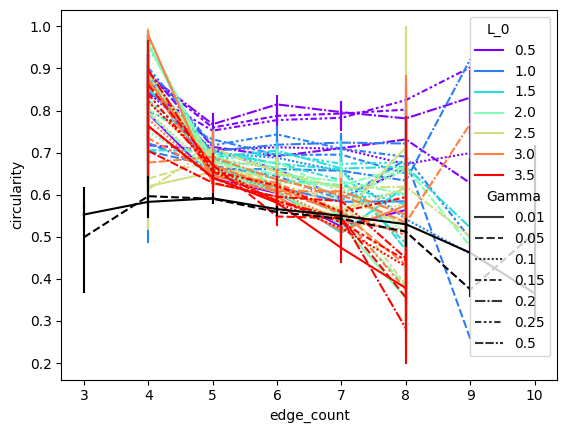

In [63]:
sns.lineplot(df, x='edge_count', y='circularity', hue="L_0", style='Gamma', palette='rainbow', err_style="bars", estimator='median')

sns.lineplot(uns_data, x='cell_edge_count', y='circularity', color='black', err_style="bars",  estimator='median')
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='circularity', color='black', linestyle='--',err_style="bars",  estimator='median')

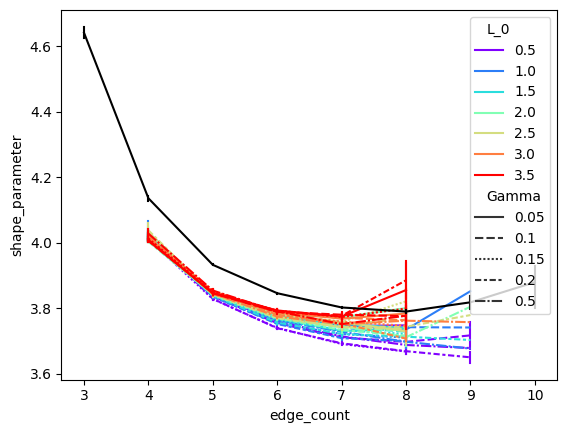

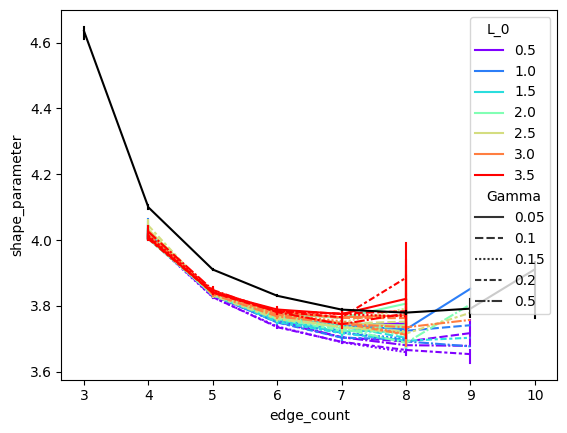

In [284]:
sns.lineplot(df, x='edge_count', y='shape_parameter', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")

sns.lineplot(uns_data, x='cell_edge_count', y='shape_parameter', color='black',err_style="bars")

plt.show()

sns.lineplot(df, x='edge_count', y='shape_parameter', hue="L_0", style='Gamma', palette='rainbow', err_style="bars", estimator='median')

sns.lineplot(uns_data, x='cell_edge_count', y='shape_parameter', color='black',err_style="bars", estimator='median')

plt.show()

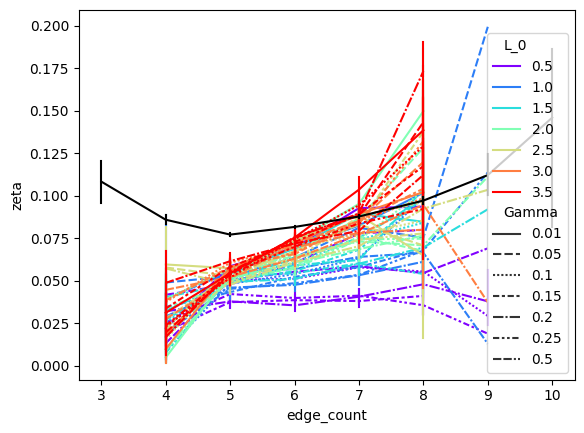

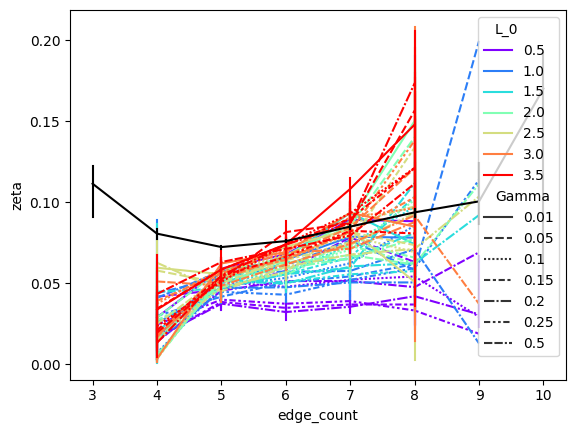

In [81]:
sns.lineplot(df, x='edge_count', y='zeta', hue="L_0", style='Gamma', palette='rainbow', err_style="bars")

sns.lineplot(uns_data, x='cell_edge_count', y='cell_zeta', color='black',err_style="bars")

plt.show()

sns.lineplot(df, x='edge_count', y='zeta', hue="L_0", style='Gamma', palette='rainbow', err_style="bars", estimator='median')

sns.lineplot(uns_data, x='cell_edge_count', y='cell_zeta', color='black',err_style="bars", estimator='median')

plt.show()

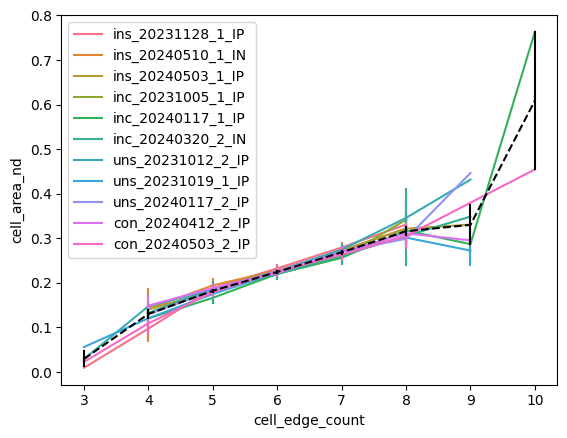

In [17]:
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_area_nd', hue='experiment', err_style='bars')

sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_area_nd', color='black', linestyle='--', err_style='bars')
plt.show()

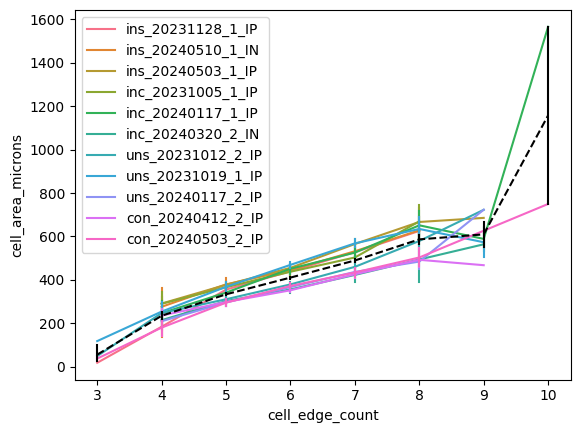

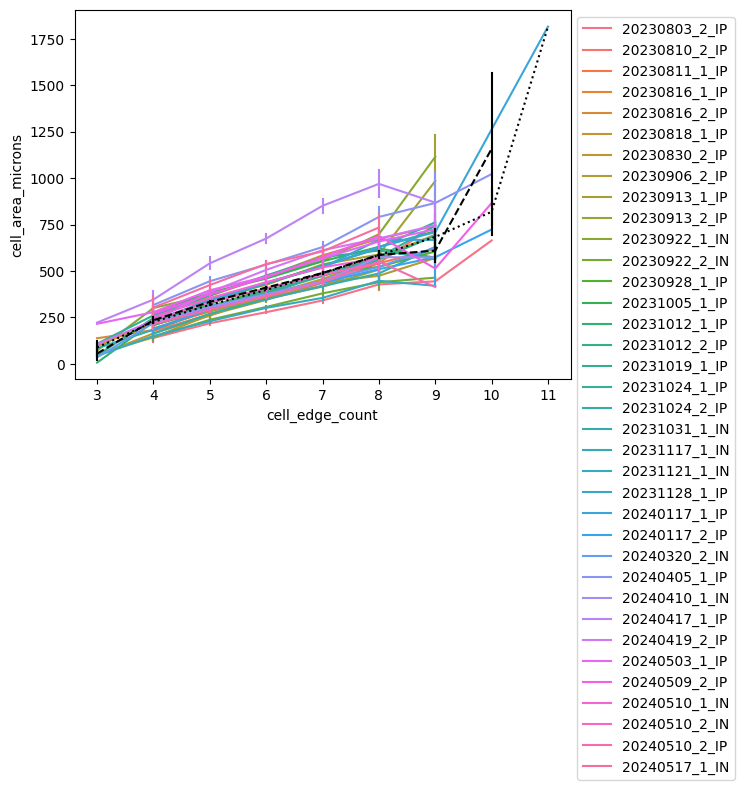

In [16]:
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_area_microns', hue='experiment', err_style='bars')

sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_area_microns', color='black', linestyle='--', err_style='bars')
plt.show()
g=sns.lineplot(full_dat[full_dat.time==0], x='cell_edge_count', y='cell_area_microns', hue='experiment', err_style='bars')

sns.lineplot(full_dat[full_dat.time==0], x='cell_edge_count', y='cell_area_microns', color='black', linestyle=':', err_style='bars')
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_area_microns', color='black', linestyle='--', err_style='bars')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


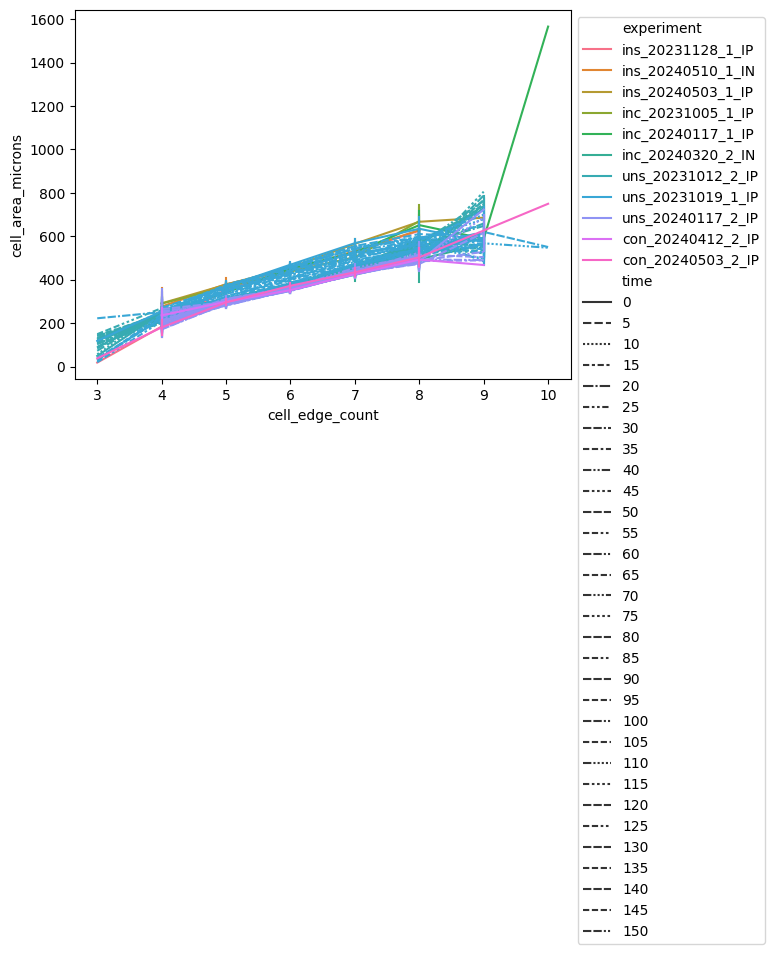

In [272]:
g=sns.lineplot(uns_data, x='cell_edge_count', y='cell_area_microns', hue='experiment',style='time', err_style='bars')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

#sns.lineplot(cell_data[cell_data.time==0], x='cell_edge_count', y='cell_area_microns', color='black', linestyle='--', err_style='bars')


<AxesSubplot: xlabel='cell_edge_count', ylabel='area_norm_mean'>

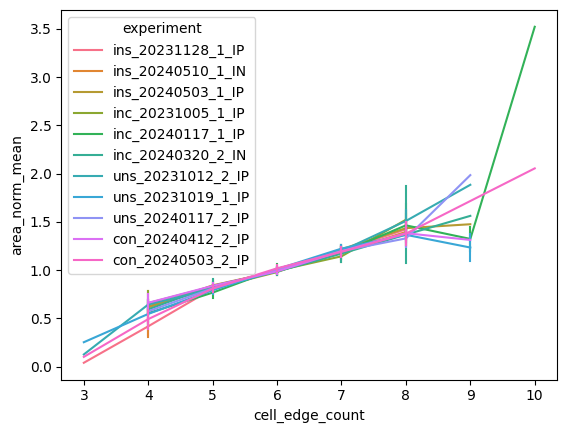

In [273]:
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='area_norm_mean', hue='experiment', err_style='bars')

#sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='area_norm_mean', color='black', linestyle='--', err_style='bars')

In [120]:
g=sns.lineplot(full_dat[full_dat.time==0], x='cell_edge_count', y='area_norm_mean', hue='experiment', err_style='bars')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


ValueError: Could not interpret value `area_norm_mean` for parameter `y`

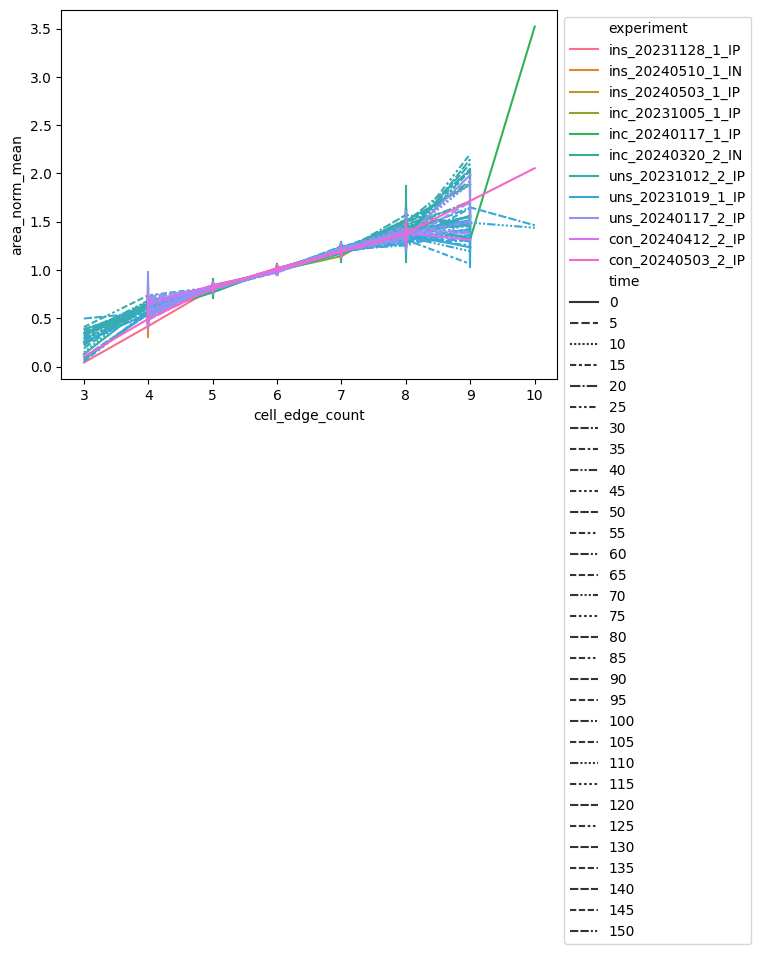

In [274]:
g=sns.lineplot(uns_data, x='cell_edge_count', y='area_norm_mean', hue='experiment',style='time', err_style='bars')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


In [122]:
g=sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='circularity', hue='experiment', err_style='bars')
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='circularity', color='black', linestyle='--', err_style='bars')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


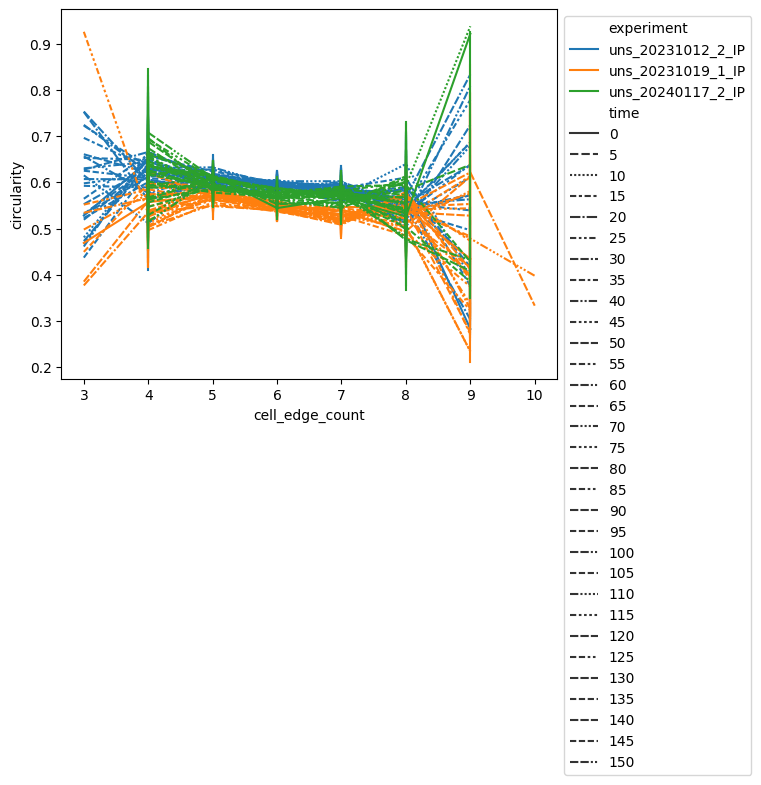

In [276]:
g=sns.lineplot(uns_data[uns_data.stretch_type=='u'], x='cell_edge_count', y='circularity', hue='experiment',style='time', err_style='bars')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

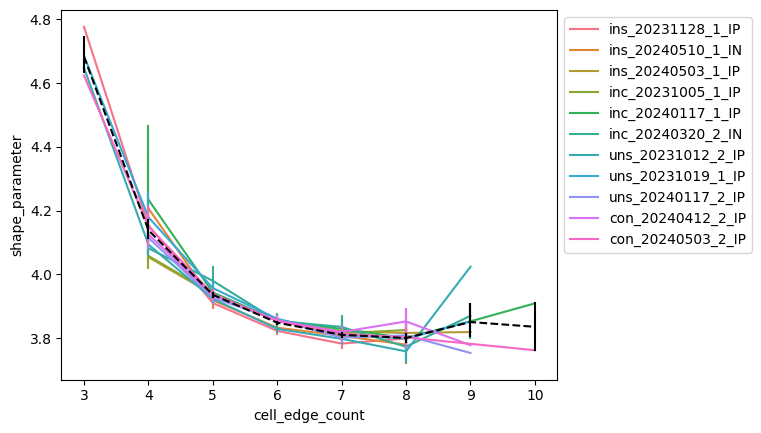

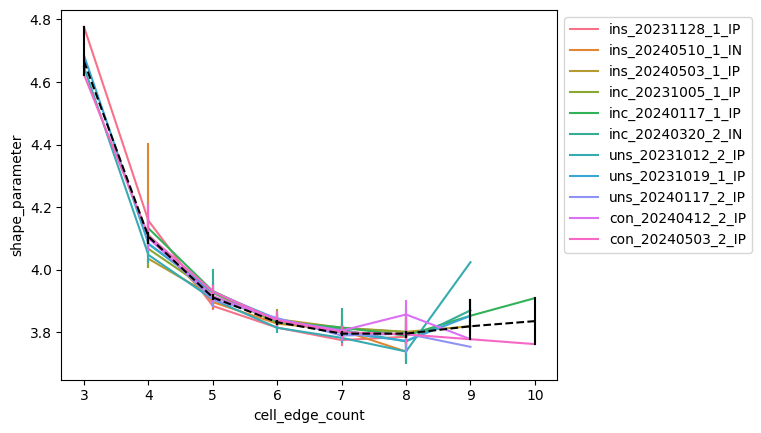

In [277]:
g=sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='shape_parameter', hue='experiment', err_style='bars')
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='shape_parameter', color='black', linestyle='--', err_style='bars')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()

g=sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='shape_parameter', hue='experiment', err_style='bars', estimator='median')
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='shape_parameter', color='black', linestyle='--', err_style='bars', estimator='median')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()

<AxesSubplot: xlabel='circularity', ylabel='Density'>

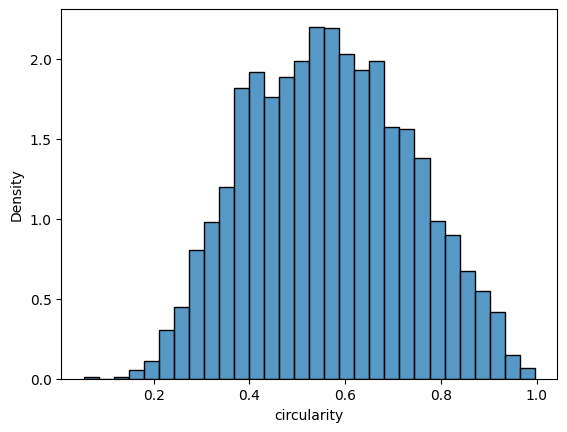

In [278]:
sns.histplot(uns_data[uns_data.time==0], x='circularity', stat='density')

<AxesSubplot: xlabel='circularity', ylabel='Probability'>

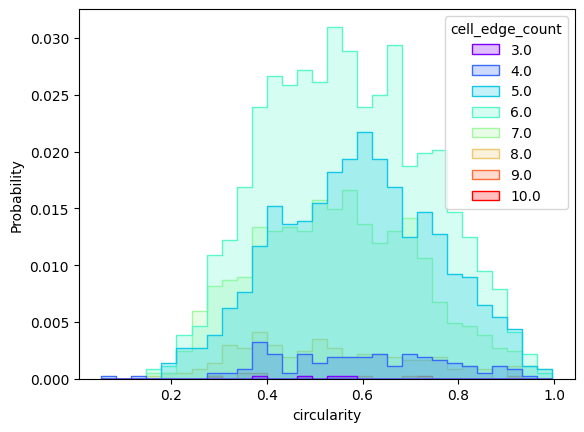

In [279]:
sns.histplot(uns_data[uns_data.time==0], x='circularity', stat='probability', hue='cell_edge_count', palette='rainbow', element='step')

<AxesSubplot: xlabel='circularity', ylabel='Probability'>

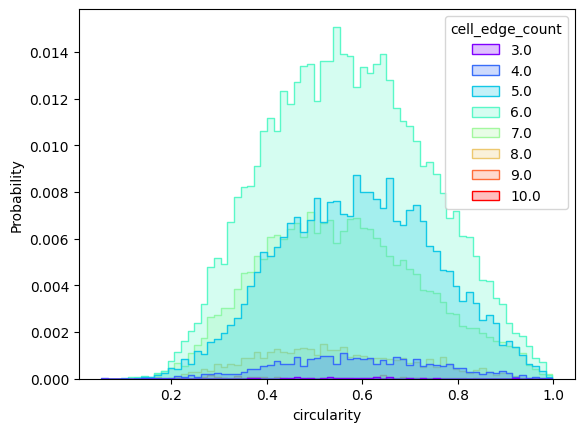

In [280]:
sns.histplot(uns_data, x='circularity', stat='probability', hue='cell_edge_count', palette='rainbow', element='step')

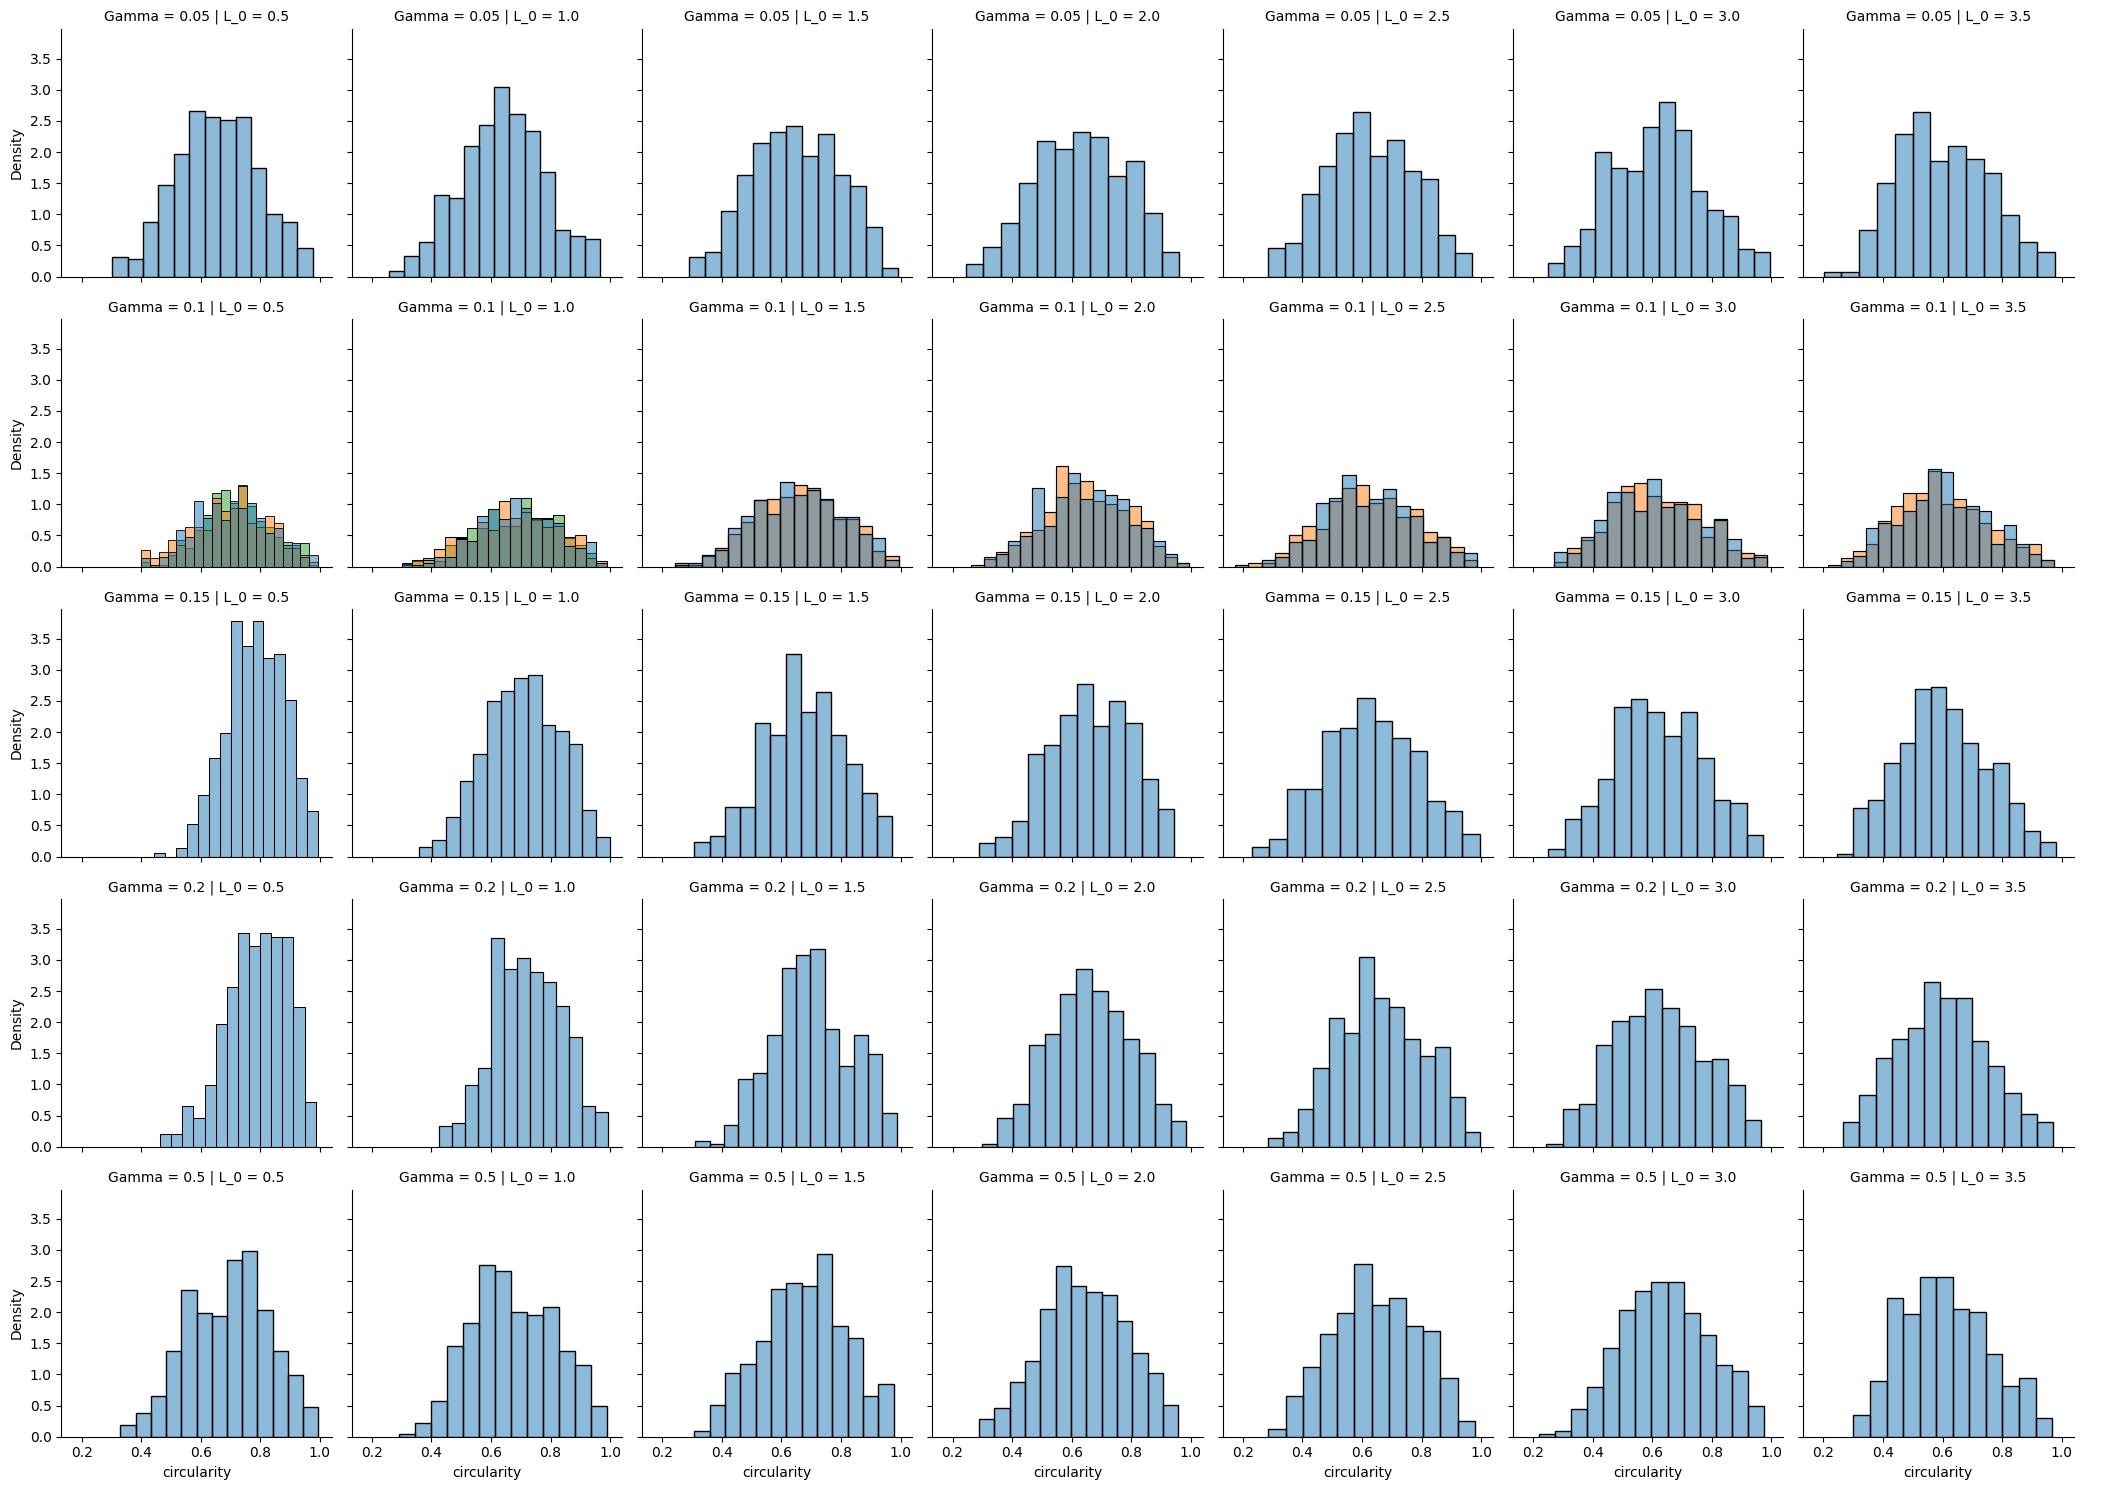

In [281]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.histplot, x="circularity", stat='density', hue='sample_set')
g.add_legend()
plt.show()

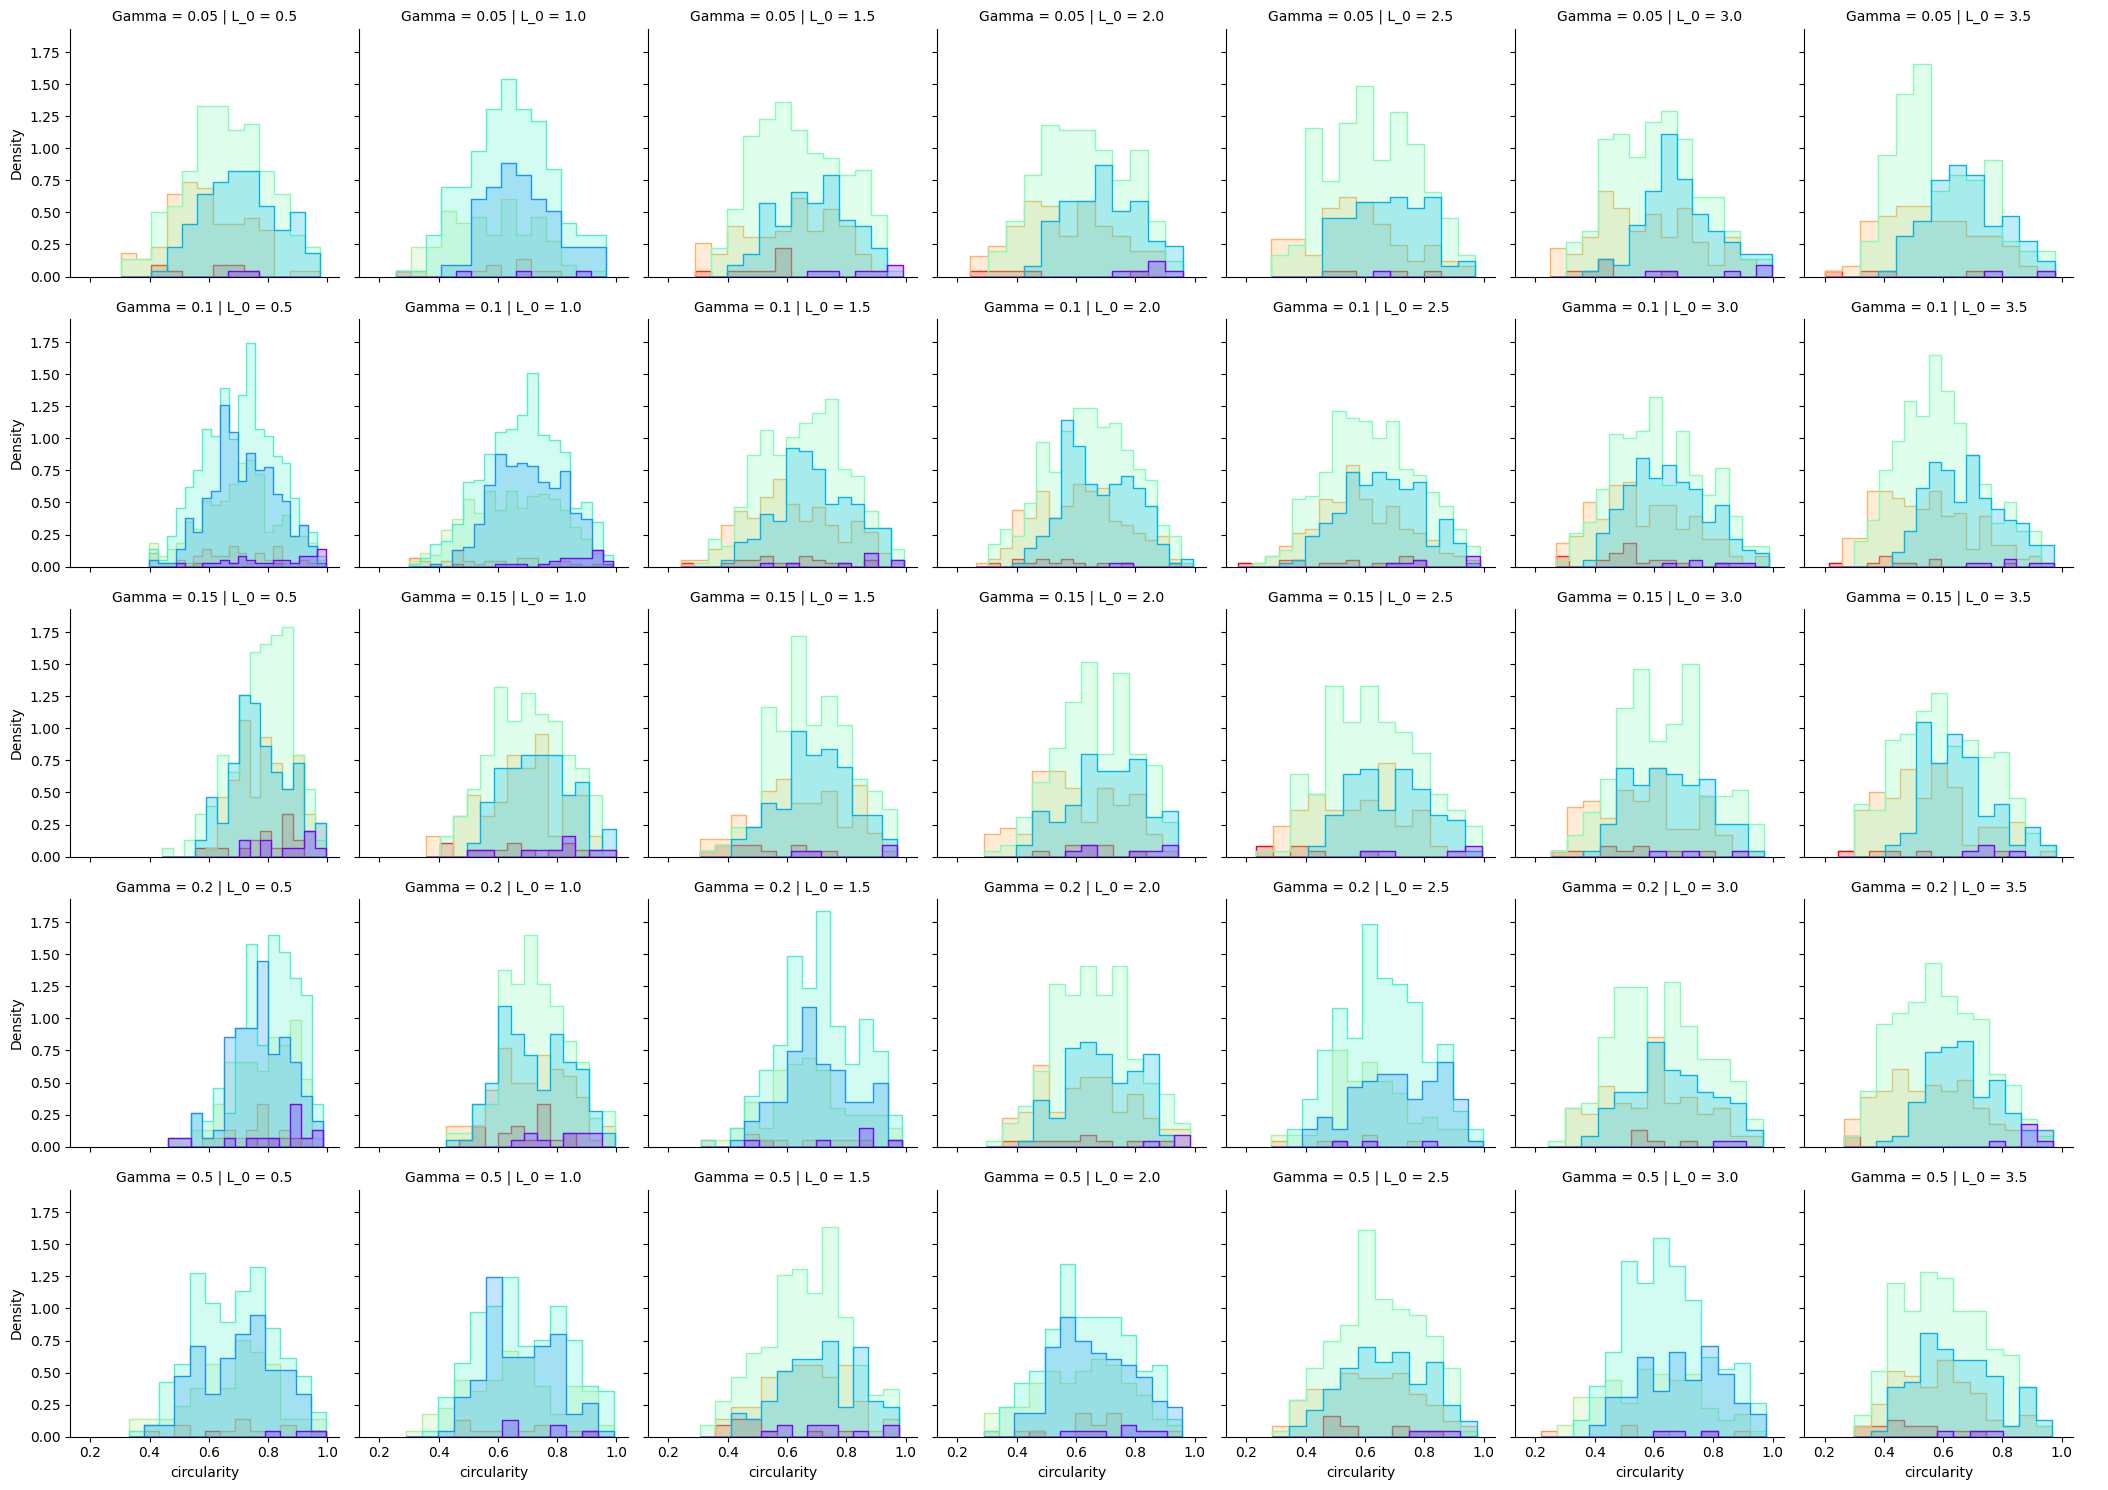

In [282]:
g = sns.FacetGrid(df, col="L_0", row="Gamma", )
g.map_dataframe(sns.histplot, x="circularity", stat='density', hue='edge_count', palette='rainbow', element='step')
g.add_legend()
plt.show()

In [ ]:
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_area_microns', hue='experiment', err_style='bars')

sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_area_microns', color='black', linestyle='--', err_style='bars')

In [288]:
np.unique(uns_data.experiment)

array(['con_20240412_2_IP', 'con_20240503_2_IP', 'inc_20231005_1_IP',
       'inc_20240117_1_IP', 'inc_20240320_2_IN', 'ins_20231128_1_IP',
       'ins_20240503_1_IP', 'ins_20240510_1_IN', 'uns_20231012_2_IP',
       'uns_20231019_1_IP', 'uns_20240117_2_IP'], dtype=object)

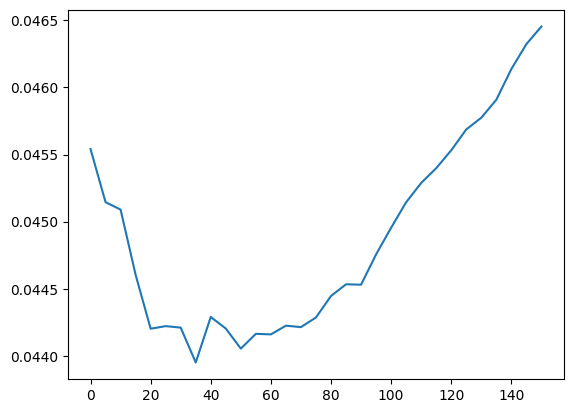

In [292]:
plt.plot(uns_data[uns_data.experiment=='uns_20240117_2_IP'].groupby('time').cell_area_microns.mean()/8000)

<AxesSubplot: xlabel='cell_edge_count', ylabel='cell_zeta'>

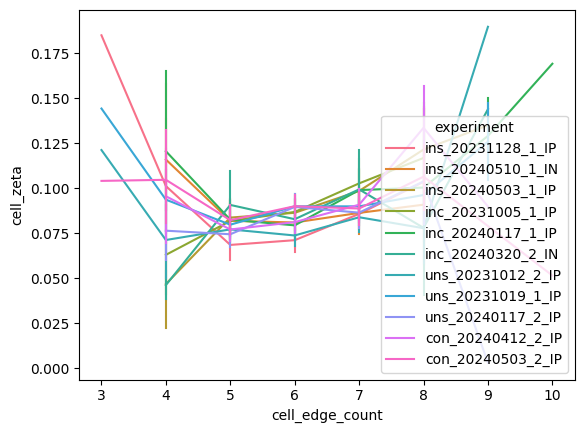

In [71]:
sns.lineplot(uns_data[uns_data.time==0], x='cell_edge_count', y='cell_zeta', hue='experiment', err_style='bars')


<AxesSubplot: xlabel='cell_edge_count', ylabel='cell_zeta'>

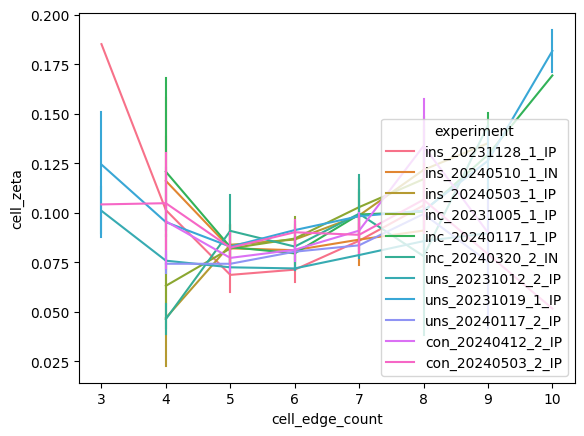

In [72]:
sns.lineplot(uns_data, x='cell_edge_count', y='cell_zeta', hue='experiment', err_style='bars')


In [88]:
np.linalg.det(np.ones((7,2,2)))

array([0., 0., 0., 0., 0., 0., 0.])

In [64]:
pa_dat_u=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/pref_area_test/pref_area_analysis_unstretched.csv')
pa_dat_f=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/pref_area_test/pref_area_analysis_instant.csv')

pa_dat_s=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/pref_area_test/pref_area_analysis_incremental.csv')

pa_dat_c=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/pref_area_test/pref_area_analysis_continuous.csv')


In [66]:
pa_all=pd.concat([pa_dat_u, pa_dat_f, pa_dat_s, pa_dat_c])

In [36]:
pa_dat[pa_dat.method=='min_sum_int_vert'].groupby(['experiment', 'time']).mean()

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\2467328033.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pa_dat[pa_dat.method=='min_sum_int_vert'].groupby(['experiment', 'time']).mean()


pref_area     P_ext  total_energy  sum_fk_mean  \
experiment        time                                                      
uns_20231012_2_IP 0.0    8059.929375 -0.810824    198.419801     0.039921   
                  5.0    8024.740178 -0.807369    198.752504     0.039040   
                  10.0   8052.231869 -0.811035    199.311469     0.039664   
                  15.0   8041.479543 -0.810977    199.760871     0.039906   
                  20.0   8456.002233 -0.839580    200.560306     0.040161   
...                              ...       ...           ...          ...   
uns_20240117_2_IP 130.0  8292.587847 -0.862128    185.402654     0.039352   
                  135.0  8102.691402 -0.846968    185.447489     0.039170   
                  140.0  8105.556105 -0.844852    185.370309     0.038697   
                  145.0  8150.796762 -0.845703    185.385947     0.038127   
                  150.0  8164.858685 -0.844590    185.375488     0.038505   

                         mean_areas_nd  
experiment        time                  
uns_20231012_2_IP 0.0         0.047592  
                  5.0         0.047881  
                  10.0        0.047617  
                  15.0        0.047631  
                  20.0        0.045425  
...                                ...  
uns_20240117_2_IP 130.0       0.044159  
                  135.0       0.045327  
                  140.0       0.045537  
                  145.0       0.045466  
                  150.0       0.045516  

[85 rows x 5 columns]

In [68]:
pa_dat_f_all=pa_all[pa_all.method=='min_sum_int_vert'].merge(cell_data.groupby(['experiment','time']).mean().cell_area_microns, on=['experiment', 'time'])

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\3845203333.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pa_dat_f_all=pa_all[pa_all.method=='min_sum_int_vert'].merge(cell_data.groupby(['experiment','time']).mean().cell_area_microns, on=['experiment', 'time'])


In [71]:
pa_dat_fls_all=pa_all[pa_all.method=='int_vert_force_ls'].merge(cell_data.groupby(['experiment','time']).mean().cell_area_microns, on=['experiment', 'time'])

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\4016981448.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pa_dat_fls_all=pa_all[pa_all.method=='int_vert_force_ls'].merge(cell_data.groupby(['experiment','time']).mean().cell_area_microns, on=['experiment', 'time'])


In [67]:
pa_dat_P_all=pa_all[pa_all.method=='zero_iso_stress'].merge(cell_data.groupby(['experiment','time']).mean().cell_area_microns, on=['experiment', 'time'])

C:\Users\v35431nc\AppData\Local\Temp\ipykernel_10556\3852356183.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pa_dat_P_all=pa_all[pa_all.method=='zero_iso_stress'].merge(cell_data.groupby(['experiment','time']).mean().cell_area_microns, on=['experiment', 'time'])


In [53]:
pa_dat_f

method    pref_area     P_ext  total_energy  sum_fk_mean  \
0   min_sum_int_vert  8059.929375 -0.810824    198.419801     0.039921   
1   min_sum_int_vert  8024.740178 -0.807369    198.752504     0.039040   
2   min_sum_int_vert  8052.231869 -0.811035    199.311469     0.039664   
3   min_sum_int_vert  8041.479543 -0.810977    199.760871     0.039906   
4   min_sum_int_vert  8456.002233 -0.839580    200.560306     0.040161   
..               ...          ...       ...           ...          ...   
80  min_sum_int_vert  8292.587847 -0.862128    185.402654     0.039352   
81  min_sum_int_vert  8102.691402 -0.846968    185.447489     0.039170   
82  min_sum_int_vert  8105.556105 -0.844852    185.370309     0.038697   
83  min_sum_int_vert  8150.796762 -0.845703    185.385947     0.038127   
84  min_sum_int_vert  8164.858685 -0.844590    185.375488     0.038505   

    mean_areas_nd   time         experiment  cell_area_microns_x  \
0        0.047592    0.0  uns_20231012_2_IP           383.584621   
1        0.047881    5.0  uns_20231012_2_IP           384.235950   
2        0.047617   10.0  uns_20231012_2_IP           383.425088   
3        0.047631   15.0  uns_20231012_2_IP           383.027660   
4        0.045425   20.0  uns_20231012_2_IP           384.109760   
..            ...    ...                ...                  ...   
80       0.044159  130.0  uns_20240117_2_IP           366.196527   
81       0.045327  135.0  uns_20240117_2_IP           367.267210   
82       0.045537  140.0  uns_20240117_2_IP           369.099852   
83       0.045466  145.0  uns_20240117_2_IP           370.584465   
84       0.045516  150.0  uns_20240117_2_IP           371.635390   

    cell_area_microns_y  
0            383.584621  
1            384.235950  
2            383.425088  
3            383.027660  
4            384.109760  
..                  ...  
80           366.196527  
81           367.267210  
82           369.099852  
83           370.584465  
84           371.635390  

[85 rows x 10 columns]

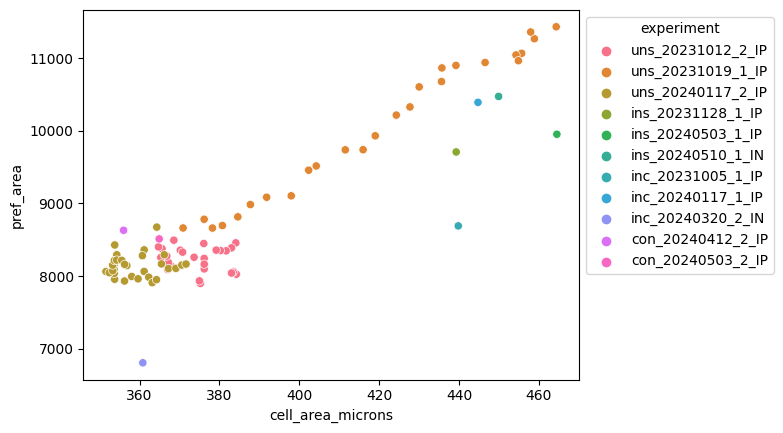

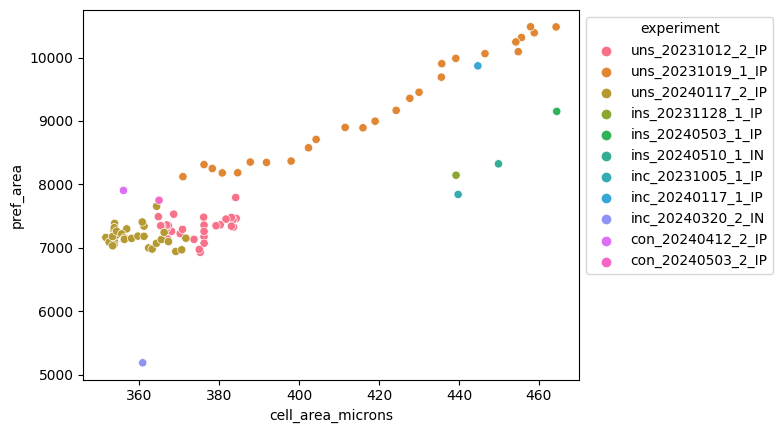

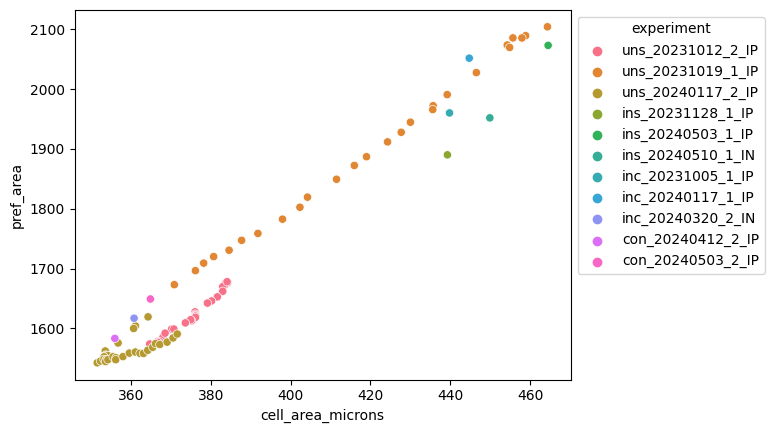

In [72]:
g=sns.scatterplot(pa_dat_f_all, x='cell_area_microns', y='pref_area', hue='experiment')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.show()

g=sns.scatterplot(pa_dat_fls_all, x='cell_area_microns', y='pref_area', hue='experiment')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

plt.show()

g=sns.scatterplot(pa_dat_P_all, x='cell_area_microns', y='pref_area', hue='experiment')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))


In [57]:
np.unique(pa_dat.method)

array(['cons_min_sum_int_verts', 'int_vert_force_ls', 'min_energy',
       'min_sum_int_vert', 'zero_dev_stress', 'zero_iso_stress'],
      dtype=object)

In [1]:
cell_data

NameError: name 'cell_data' is not defined

In [14]:
cell_data

index  cell_id_old  cell_perimeter_microns  cell_area_microns  \
0           0          0.0               20.331925          18.119110   
1           1          1.0               48.828662         144.368395   
2           2          2.0               62.469167         216.844836   
3           3          3.0               57.471806         191.127389   
4           4          4.0               68.449789         315.184846   
...       ...          ...                     ...                ...   
116869  13157        450.0               69.863383         350.692457   
116870  13158        451.0               77.891966         442.895349   
116871  13159        452.0              102.442942         759.979779   
116872  13160        453.0              100.285516         697.293502   
116873  13161        454.0              115.681445         854.666742   

        shape_parameter  circularity  cell_edge_count  \
0              4.776503     0.369100              3.0   
1              4.063860     0.665094              4.0   
2              4.242200     0.391993              4.0   
3              4.157128     0.614371              4.0   
4              3.855578     0.689709              5.0   
...                 ...          ...              ...   
116869         3.730666     0.806380              8.0   
116870         3.701196     0.576208              8.0   
116871         3.716045     0.535076              8.0   
116872         3.797785     0.634386              9.0   
116873         3.956993     0.423170             10.0   

        major_shape_axis_alignment_rads        cc_x        cc_y  ...  \
0                              1.069451    0.164483  115.228662  ...   
1                              1.463043  -29.658380  -70.375863  ...   
2                              0.661316   45.484423   56.664127  ...   
3                              0.937894   31.158637  169.108033  ...   
4                              1.141720   35.915879 -223.148209  ...   
...                                 ...         ...         ...  ...   
116869                         1.030964 -197.562835   72.128731  ...   
116870                         0.301819  -86.605567  115.579111  ...   
116871                         2.569979 -151.612200  135.783875  ...   
116872                         0.058905 -143.585856 -117.920692  ...   
116873                         2.259156 -125.812270 -151.515712  ...   

        perimeter_norm  first_frame  last_frame  area_norm_mean  \
0             1.000000            0          29        0.041248   
1             1.000000            0          29        0.328654   
2             1.000000            0          29        0.493646   
3             1.000000            0          29        0.435100   
4             1.000000            0          29        0.717516   
...                ...          ...         ...             ...   
116869        1.004973            0          29        1.012828   
116870        1.026201            0          29        1.279118   
116871        1.035869            0          29        2.194883   
116872        1.188997            0          29        2.013840   
116873        1.207401            0          29        2.468347   

        area_norm_last  circ_norm  circ_norm_last  aligned_time  \
0             0.069081   1.000000        1.298874             0   
1             0.447261   1.000000        1.391033             0   
2             0.665173   1.000000        1.354912             0   
3             0.525723   1.000000        0.993951             0   
4             0.960802   1.000000        0.883240             0   
...                ...        ...             ...           ...   
116869        1.000000   1.210617        1.000000           145   
116870        1.000000   1.012317        1.000000           145   
116871        1.000000   1.364991        1.000000           145   
116872        1.000000   0.790322        1.000000           145   
116873        1.000000   0.451752      

In [28]:
df_area_norm_summary=df.groupby(['Gamma', 'L_0', 'edge_count']).area_norm.describe()[['mean', 'std']].reset_index()

<AxesSubplot: xlabel='mean', ylabel='std'>

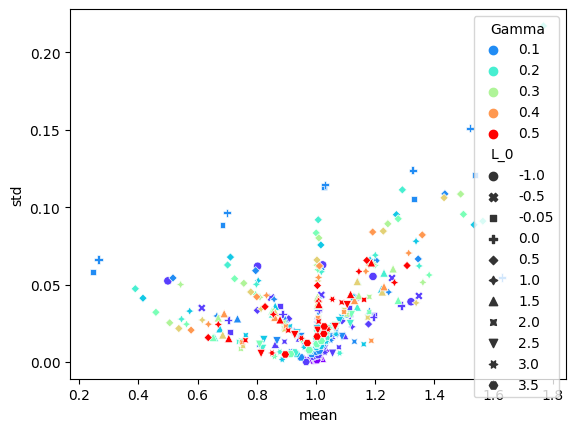

In [32]:
sns.scatterplot(df_area_norm_summary, x='mean', y='std', hue='Gamma',style='L_0', palette='rainbow' )

In [33]:
a_dat_summary=cell_data.groupby('cell_edge_count').area_norm_mean.describe()[['mean', 'std']].reset_index()

In [45]:
ll_calc=df_area_norm_summary.merge(a_dat_summary, left_on='edge_count', right_on='cell_edge_count')

In [46]:
ll_calc=ll_calc[(ll_calc.edge_count>4)&(ll_calc.edge_count<8)].reset_index()

In [47]:
ll_calc['deltaA_sq']=(ll_calc.mean_y-ll_calc.mean_x)

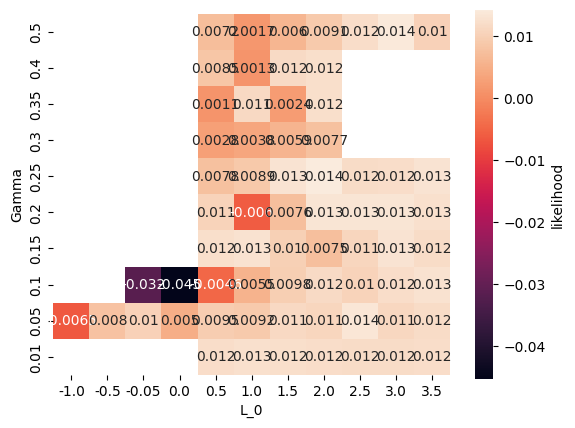

In [52]:
hm=ll_calc.groupby(['Gamma', 'L_0']).sum().reset_index().pivot(index="Gamma", columns="L_0", values="deltaA_sq")
g=sns.heatmap(hm, cbar_kws={'label': 'likelihood'}, square=True, annot=True)
g.invert_yaxis()
plt.show()